In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('/content/bank-full (1).csv',delimiter=';')
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# print shape of dataset with rows and columns
print(bank.shape)
# print top 5 records
bank.head()


(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Descriptive statistic
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Missing values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#Duplicate values
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [8]:
bank[bank.duplicated()].shape

(0, 17)

In [9]:
# List of Numerical Variables
numerical_features=[feature for feature in bank.columns if bank[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
bank[numerical_features].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [10]:
#Discrete feature :- Numerical variables are usually of 2 types
#Continuous variable & discrete variable
#Discrete variable:-
discrete_feature=[feature for feature in numerical_features if len(bank[feature].unique())<25 and feature not in year_feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))


Discrete Variables Count: 0


In [11]:
#Countinous variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [12]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


#Exploratory Data Analysis (EDA)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'balance'),
  Text(2.5, 0, 'day'),
  Text(3.5, 0, 'duration'),
  Text(4.5, 0, 'campaign'),
  Text(5.5, 0, 'pdays'),
  Text(6.5, 0, 'previous')])

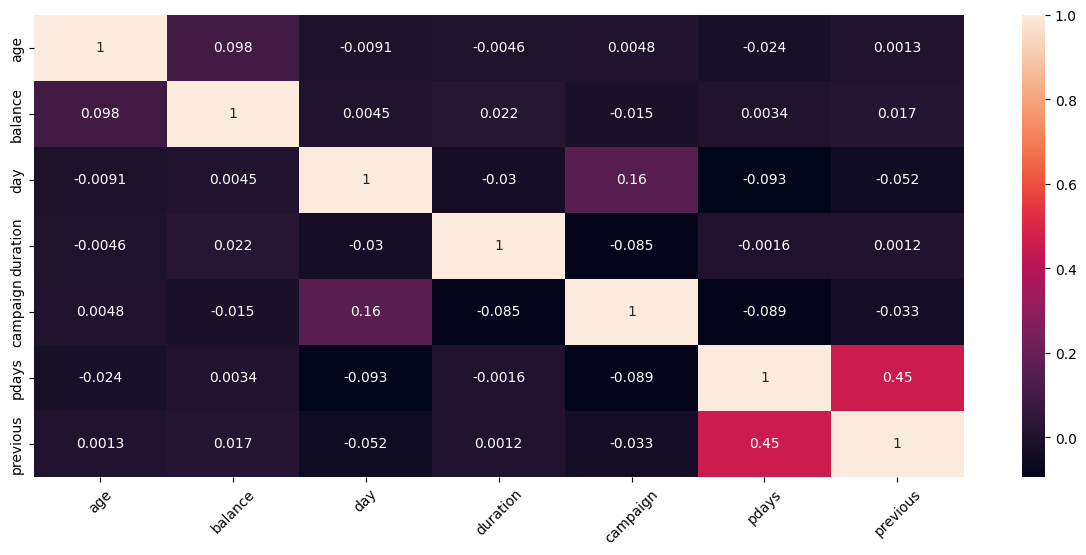

In [13]:
fig= plt.figure(figsize=(15, 6))
sns.heatmap(bank.corr(), annot=True);
plt.xticks(rotation=45)


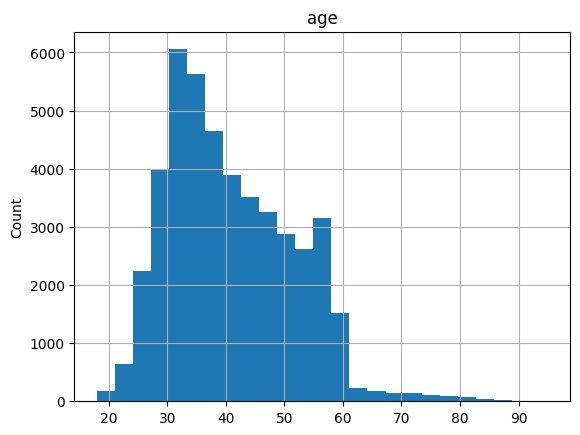

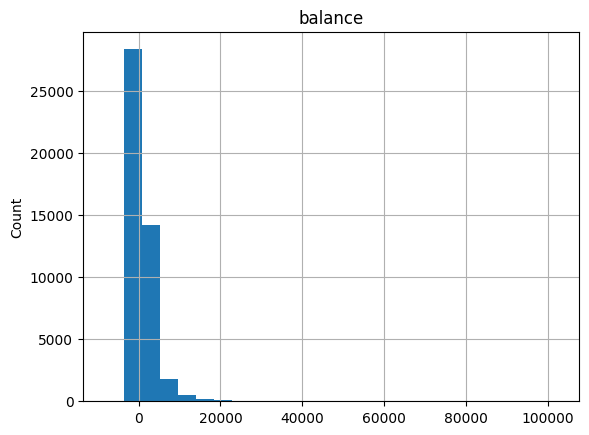

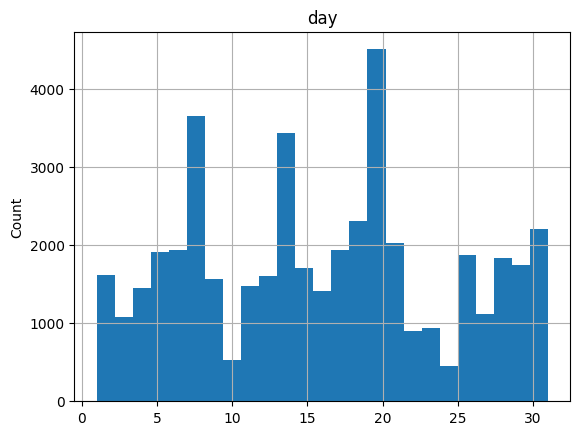

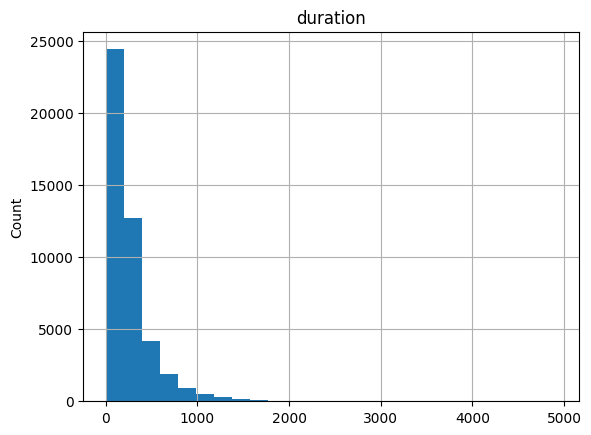

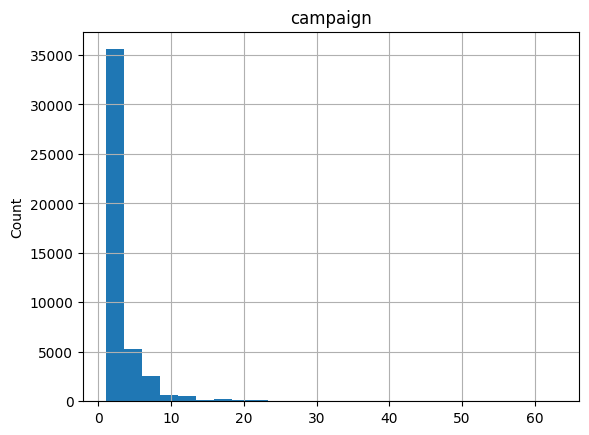

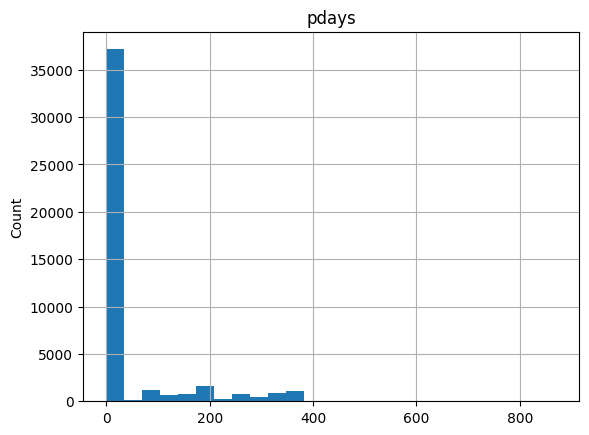

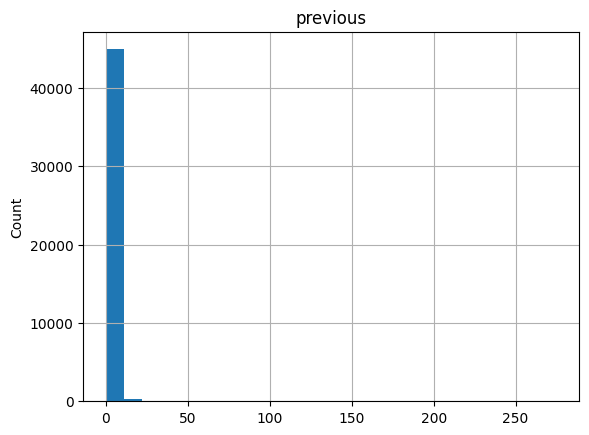

In [14]:
#Analyze the continuous values by creating histograms to understand the distribution of the numerical features
for feature in continuous_feature:
    data=bank.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()


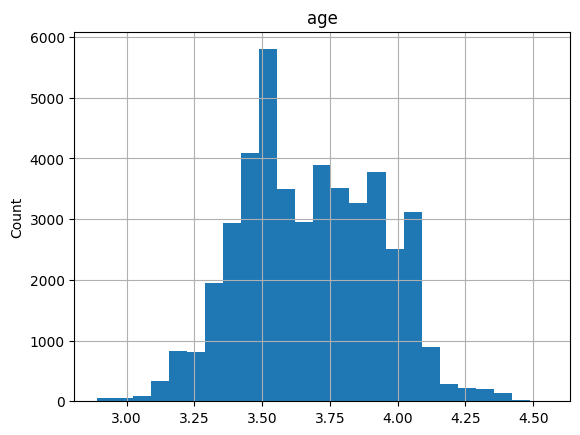

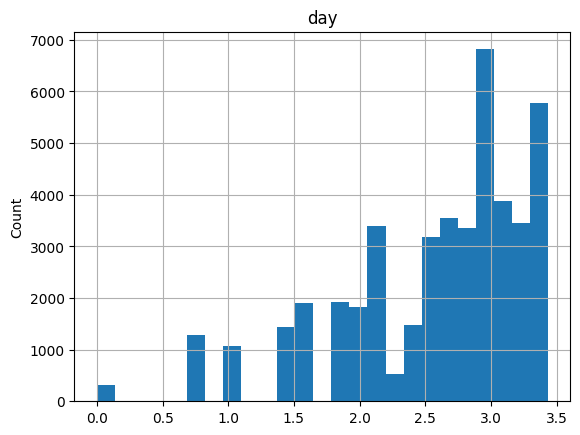

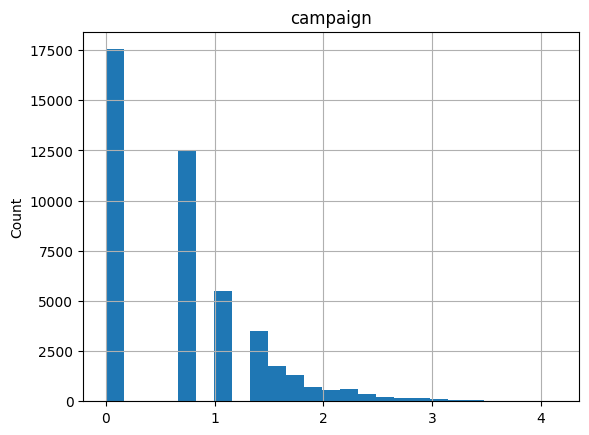

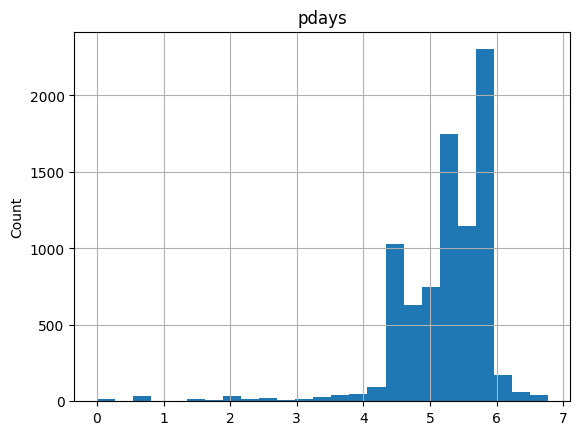

In [15]:
#logarithmic transformation
for feature in continuous_feature:
    data=bank.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

#Outliers Detection


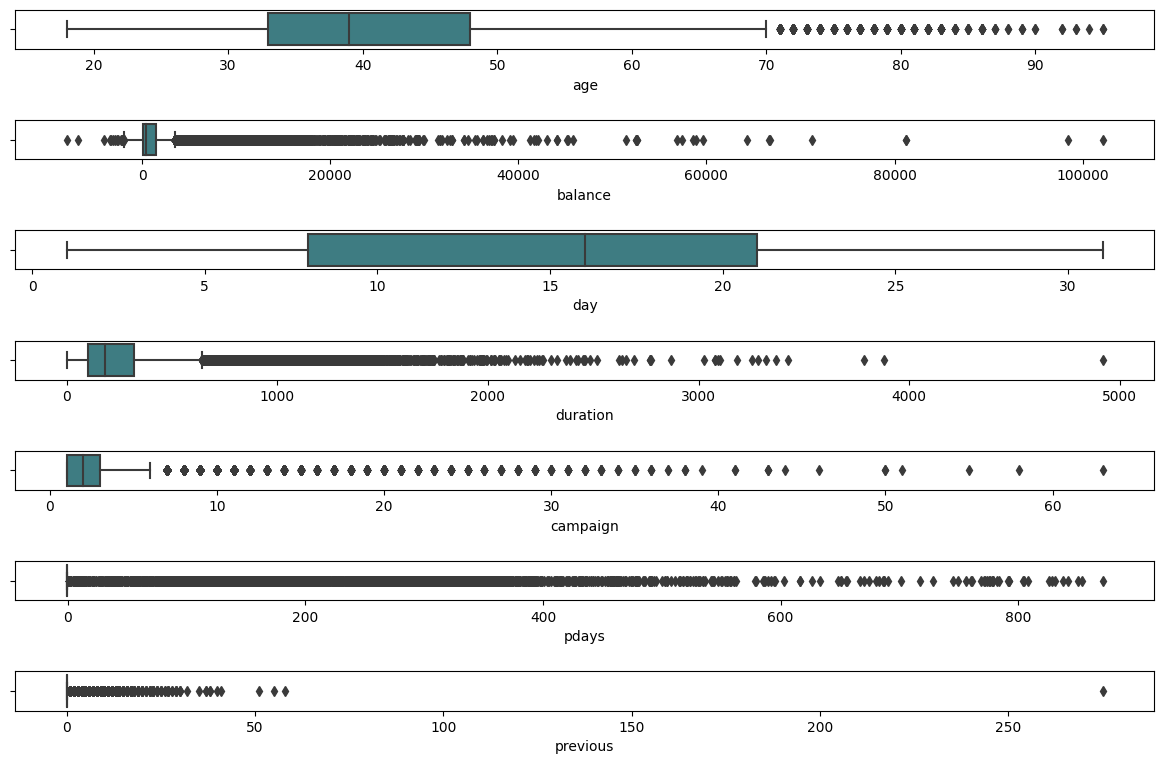

In [16]:
ot=bank.copy()
fig, axes=plt.subplots(7,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)


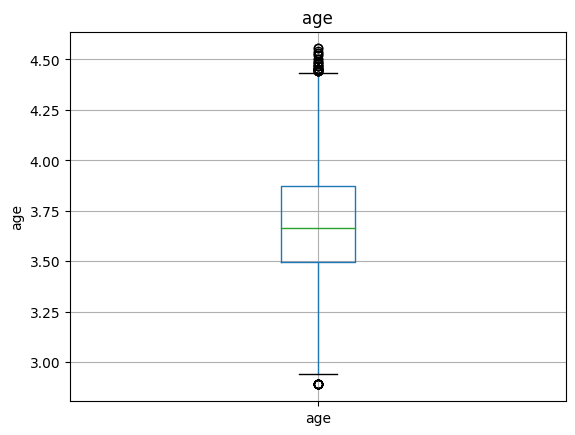

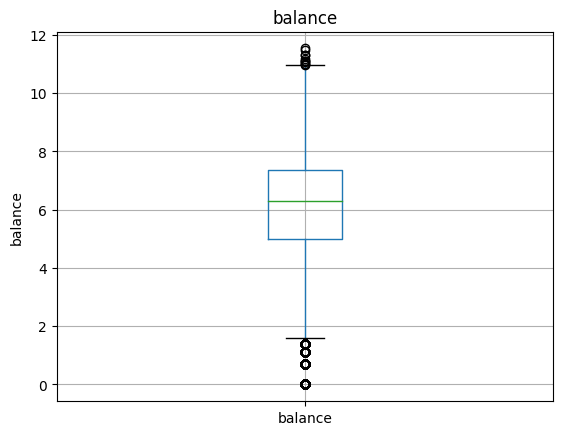

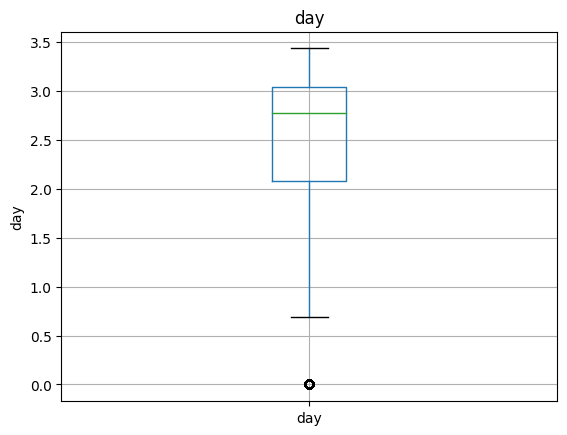

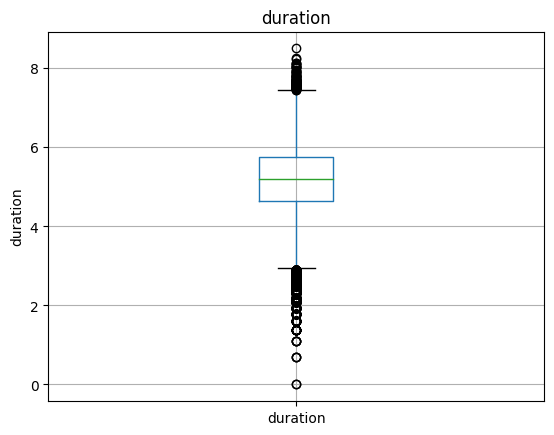

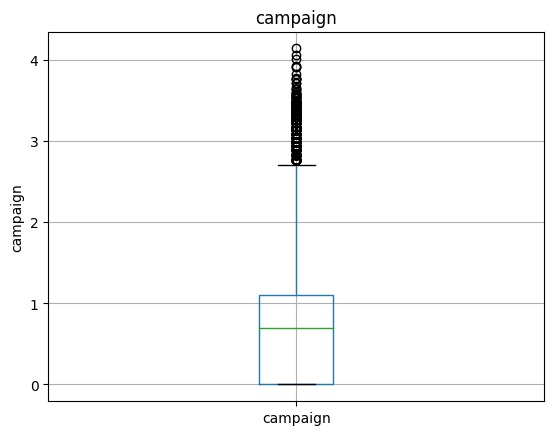

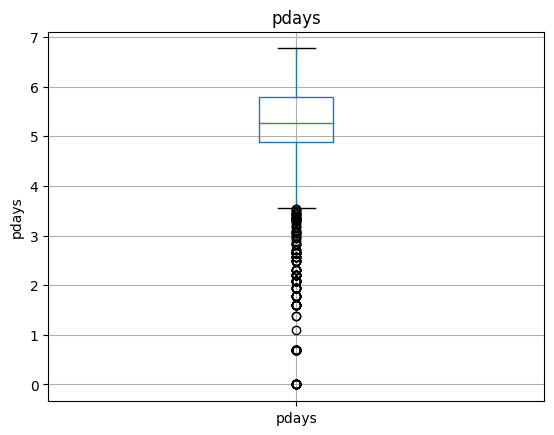

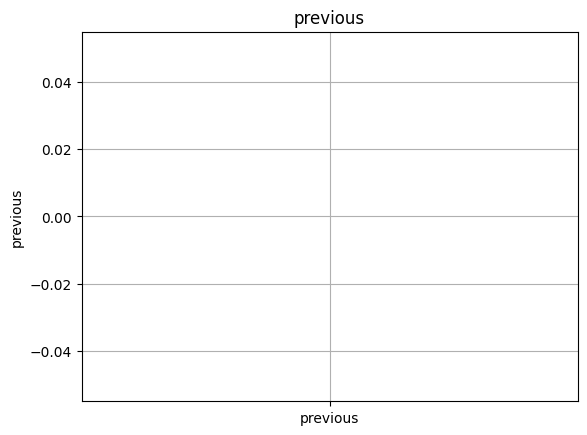

In [17]:
#After log transformation
for feature in continuous_feature:
    data=bank.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


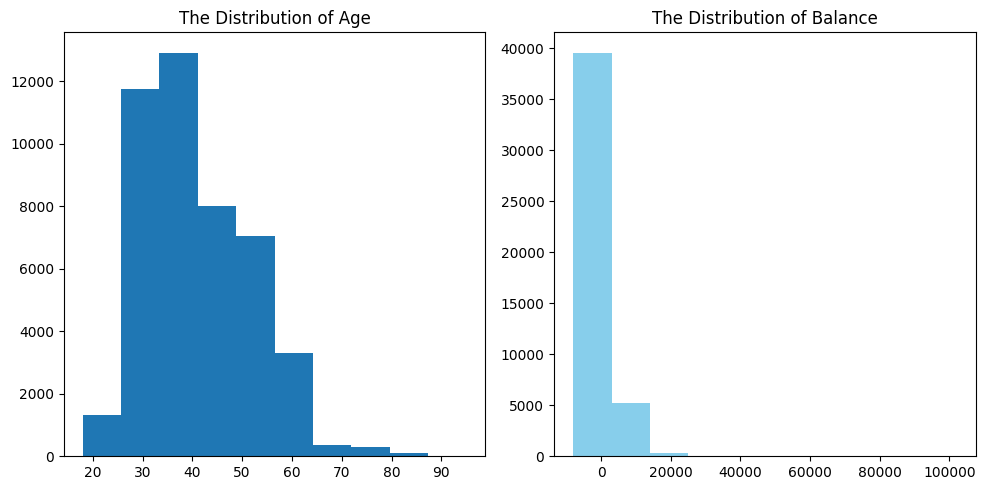

In [18]:
#Visualize the distribution of 'age' and 'balance'
dist_age_balance = plt.figure(figsize = (10,5))

bk1 = dist_age_balance.add_subplot(1,2,1)
bk2 = dist_age_balance.add_subplot(1,2,2)

bk1.hist(bank['age'])
bk1.set_title('The Distribution of Age')

bk2.hist(bank['balance'], color = 'skyblue')
bk2.set_title('The Distribution of Balance')

plt.tight_layout()
plt.show()

In [19]:
bank[['age','balance']].describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


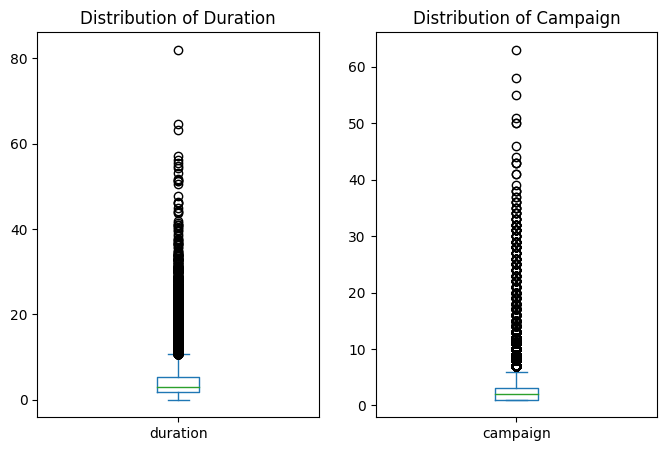

In [20]:
#Visualize the relationship between 'duration' & 'campaign'
df1 = bank.copy()
df1['duration'] = df1['duration'].apply(lambda n: n/60).round(2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

df1[['duration']].plot(kind='box', ax=axes[0], title='Distribution of Duration')
df1[['campaign']].plot(kind='box', ax=axes[1], title='Distribution of Campaign')

plt.show()

In [21]:
df1[['duration','campaign']].describe()


,duration,campaign
count,45211.000000,45211.000000
mean,4.302729,2.763841
std,4.292132,3.098021
min,0.000000,1.000000
25%,1.720000,1.000000
50%,3.000000,2.000000
75%,5.320000,3.000000
max,81.970000,63.000000


In [22]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (bank[bank['y'] == 'yes'][['y','balance']].describe())['balance']
b_df['balance_no'] = (bank[bank['y'] == 'no'][['y','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<Axes: title={'center': 'Balance and deposit statistics'}>

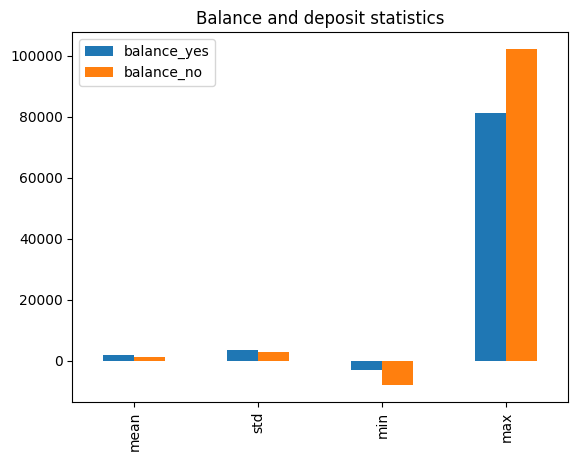

In [23]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')


In [24]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (bank[bank['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (bank[bank['y'] == 'no'][['y','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<Axes: title={'center': 'Age and deposit statistics'}>

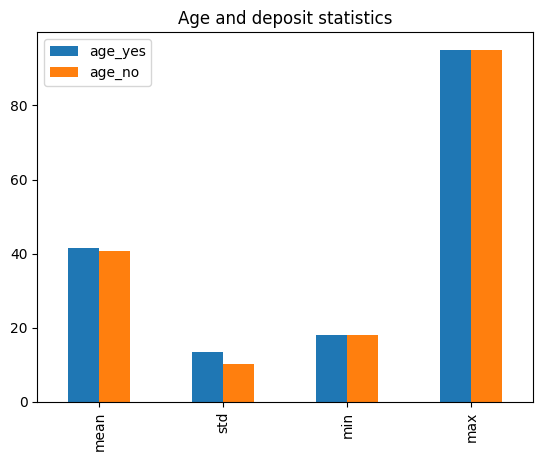

In [25]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')


In [26]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (bank[bank['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (bank[bank['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df


,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<Axes: title={'center': 'Number of contacts performed during this campaign and deposit statistics'}>

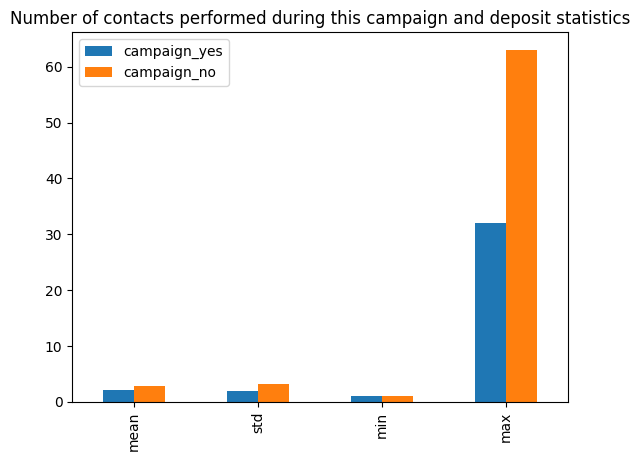

In [27]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')


In [28]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (bank[bank['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (bank[bank['y'] == 'no'][['y','previous']].describe())['previous']

p_df


,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


<Axes: title={'center': 'Number of contacts performed during previous campaign and deposit statistics'}>

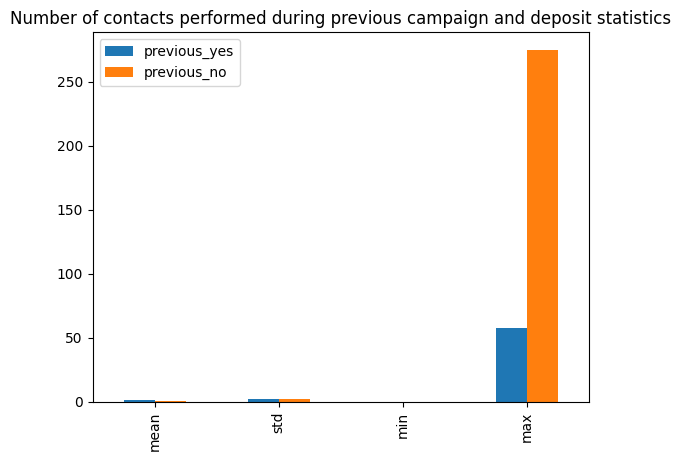

In [29]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')


In [30]:
#Categorical Variables
categorical_features=[feature for feature in bank.columns if bank[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
bank[categorical_features].head()


Number of Categorical Features: 10 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [31]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(bank[feature].unique()),feature))


12 number of unique categories in feature named job
3 number of unique categories in feature named marital
4 number of unique categories in feature named education
2 number of unique categories in feature named default
2 number of unique categories in feature named housing
2 number of unique categories in feature named loan
3 number of unique categories in feature named contact
12 number of unique categories in feature named month
4 number of unique categories in feature named poutcome
2 number of unique categories in feature named y


In [32]:
# Decide which categorical variables you want to use in the model
for feature in bank.columns:
    if bank[feature].dtypes == 'object':  # Check if the dtype is 'object'
        unique_cat = len(bank[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(bank[feature].value_counts())
        print()


Feature 'job' has 12 unique categories
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Feature 'marital' has 3 unique categories
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Feature 'education' has 4 unique categories
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Feature 'default' has 2 unique categories
no     44396
yes      815
Name: default, dtype: int64

Feature 'housing' has 2 unique categories
yes    25130
no     20081
Name: housing, dtype: int64

Feature 'loan' has 2 unique categories
no     37967
yes     7244
Name: loan, dtype: int64

Feature 'contact' has 3 unique categories
cellular     29285
unknown      13020
telephone     2906
Name: contac

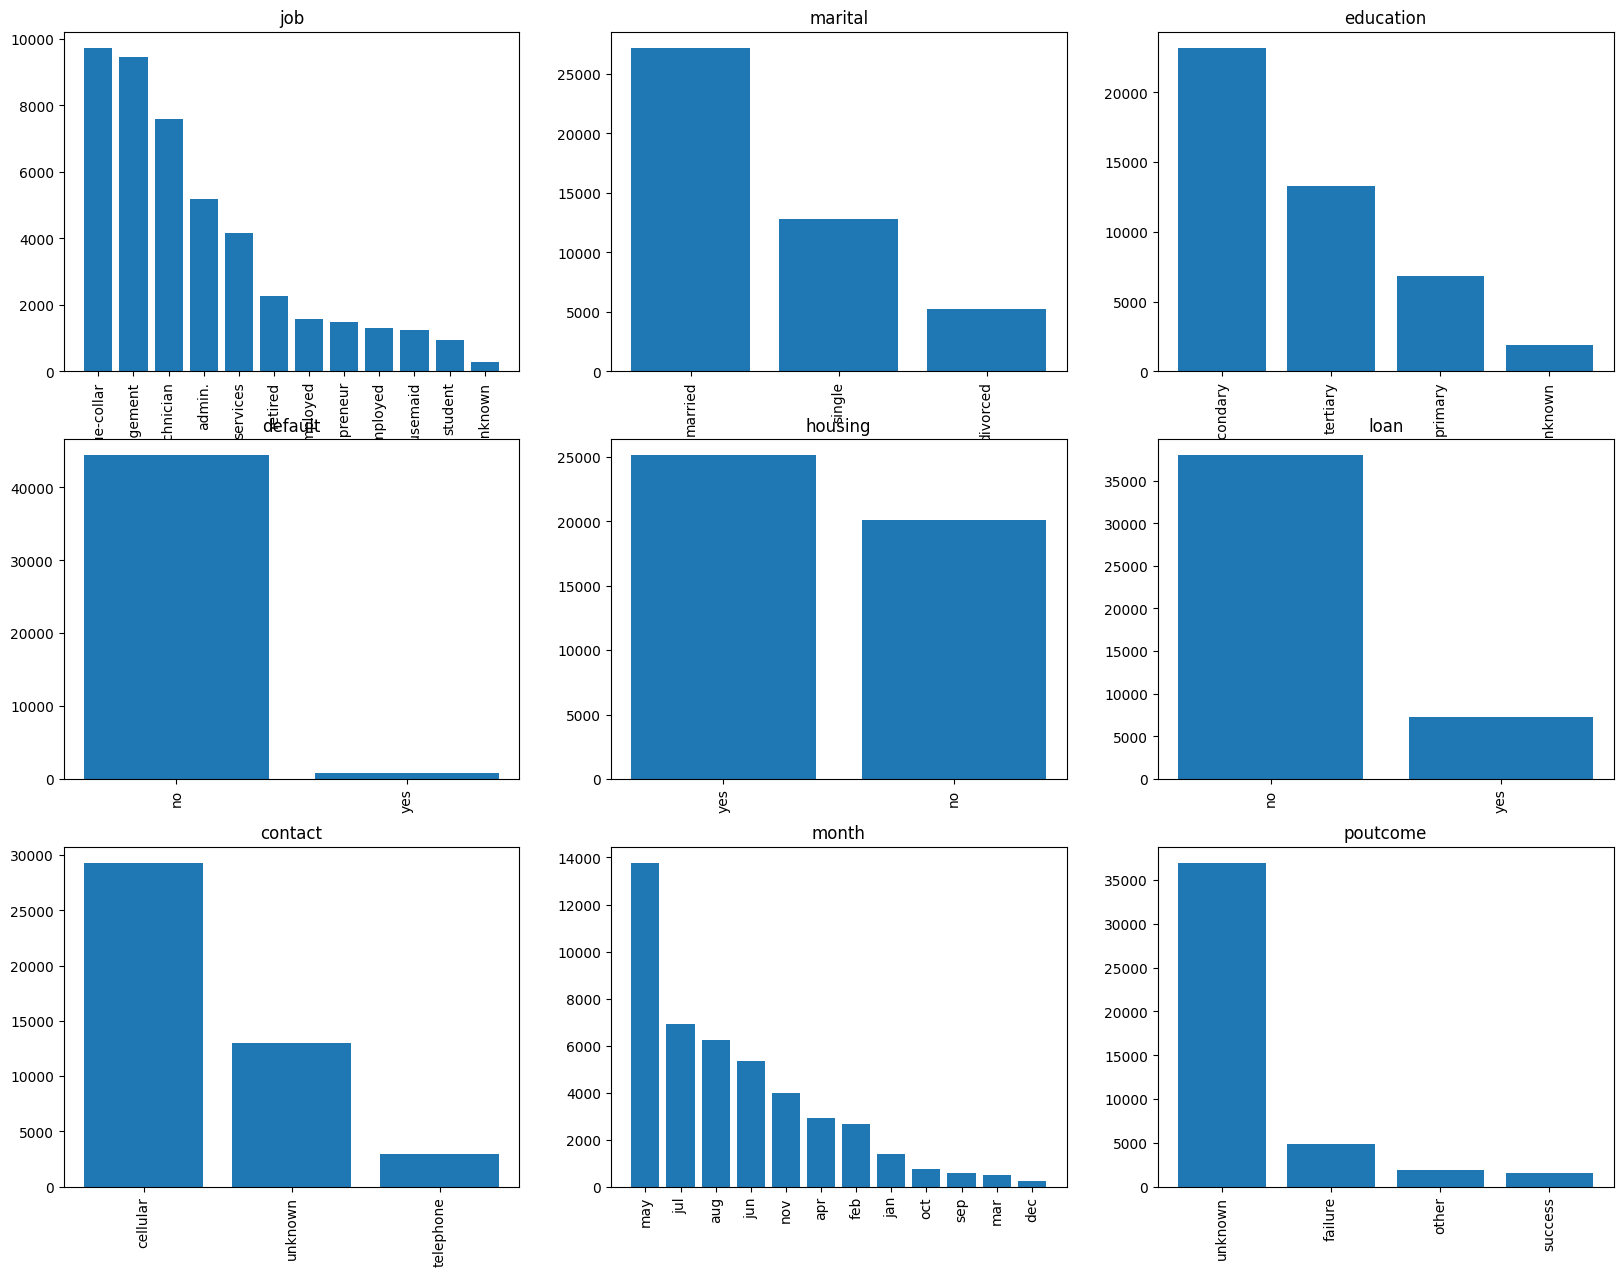

In [33]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = bank[cat_column].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))

    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)

    axs[trace_x, trace_y].set_title(cat_column)

    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    counter += 1

plt.show()

Text(0.5, 1.0, 'Jobs')

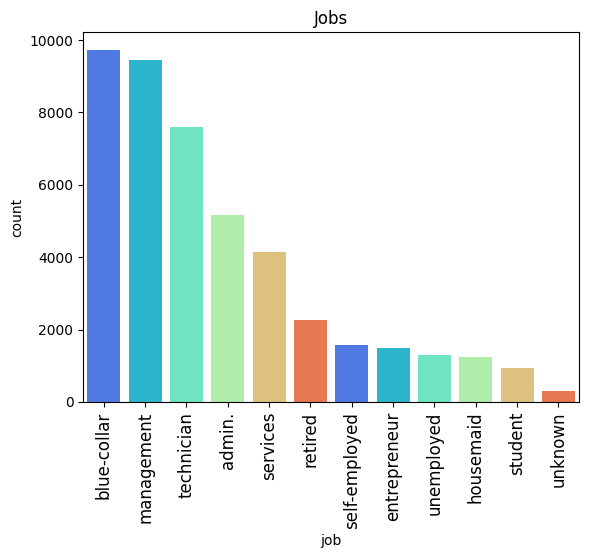

In [34]:
#Bar plot for all categorical variables in the dataset
pal = sns.color_palette('rainbow')
sns.countplot(x='job', data=bank, palette = pal,
              order=bank['job'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Jobs')


Text(0.5, 1.0, 'Marital Status')

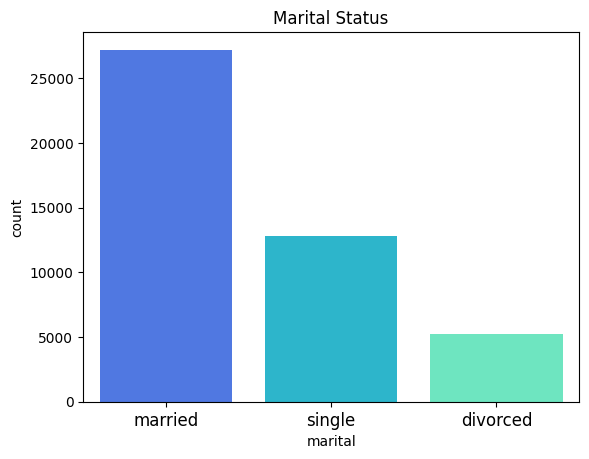

In [35]:
sns.countplot(x='marital', data=bank, palette = pal,
              order=bank['marital'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Marital Status')


Text(0.5, 1.0, 'Education')

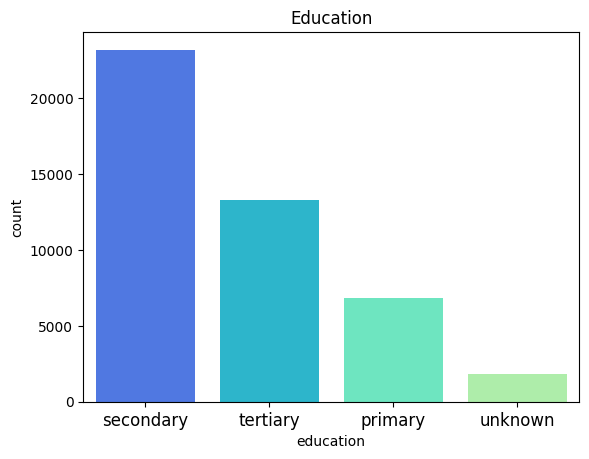

In [36]:
sns.countplot(x='education', data=bank, palette = pal,
              order=bank['education'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Education')


Text(0.5, 1.0, 'Housing')

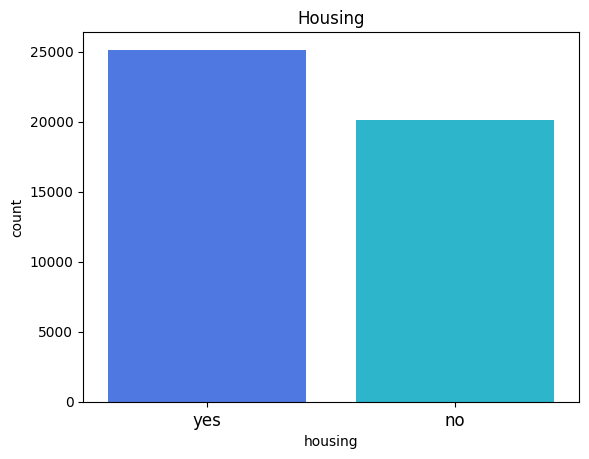

In [37]:
sns.countplot(x='housing', data=bank, palette = pal,
              order=bank['housing'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Housing')


Text(0.5, 1.0, 'Loan')

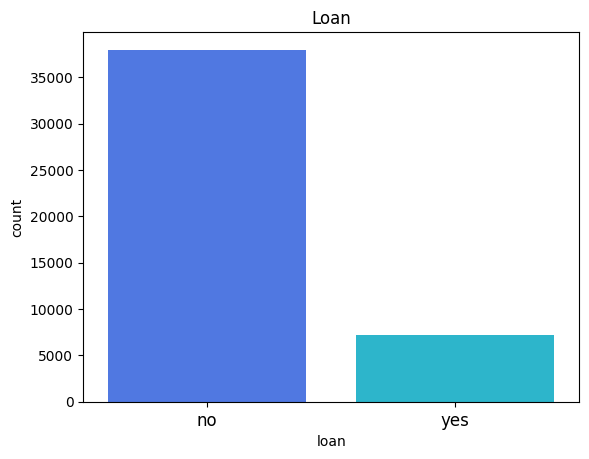

In [38]:
sns.countplot(x='loan', data=bank, palette = pal,
              order=bank['loan'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Loan')


In [39]:
#Percentage
countNotermdeposit = len(bank[bank.y == 'no'])
counthavetermdeposit = len(bank[bank.y == 'yes'])
print("Percentage of Customer doesn't have a term deposit: {:.2f}%".format((countNotermdeposit / (len(bank.y))*100)))
print("Percentage of Customer have a term deposit: {:.2f}%".format((counthavetermdeposit / (len(bank.y))*100)))

Percentage of Customer doesn't have a term deposit: 88.30%
Percentage of Customer have a term deposit: 11.70%


In [40]:
bank.y.value_counts()


no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Whether the client has subscribed a term deposit or not ')

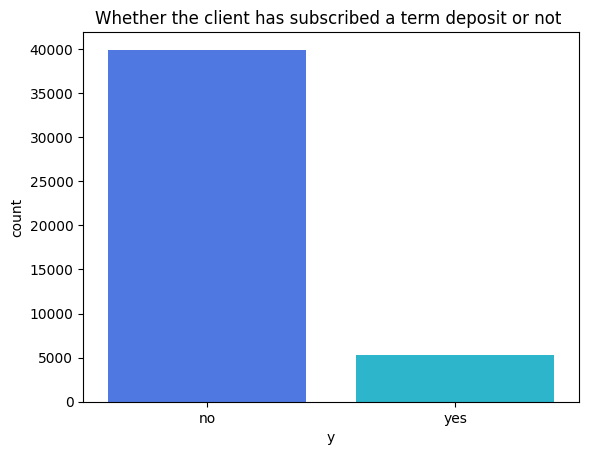

In [41]:
sns.countplot(x='y', data=bank, palette = pal,
              order=bank['y'].value_counts().index)
plt.xticks(fontsize = 10)
plt.title('Whether the client has subscribed a term deposit or not ')


#Data Visualization


<Axes: title={'center': 'Job and deposit'}>

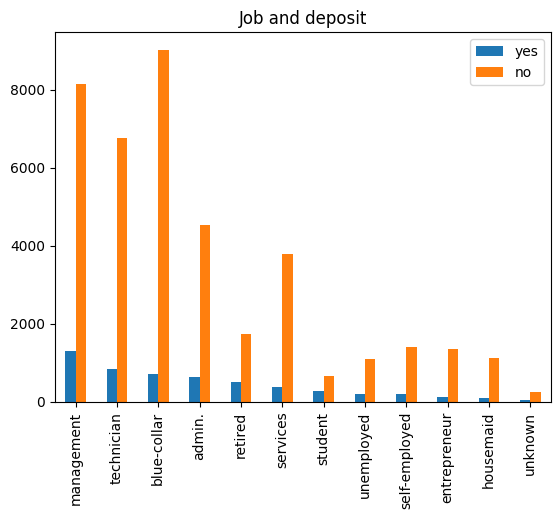

In [42]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank[bank['y'] == 'yes']['job'].value_counts()
j_df['no'] = bank[bank['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')


<Axes: xlabel='y', ylabel='job'>

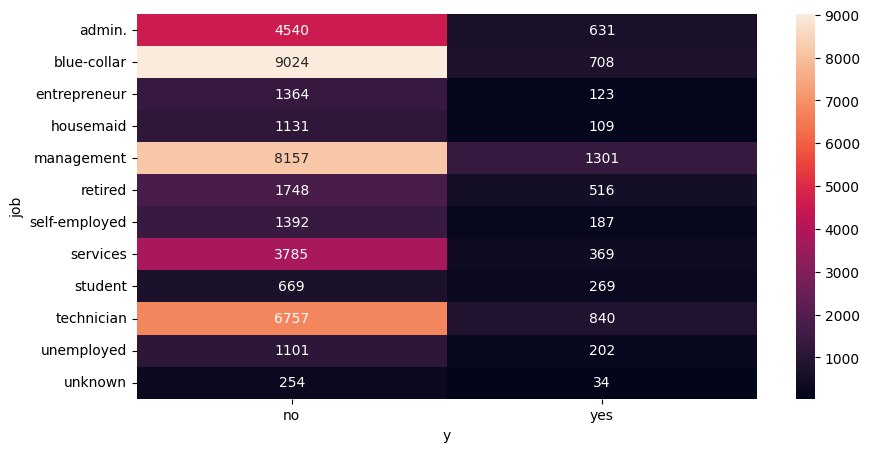

In [43]:
fig= plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(index=bank['job'], columns=bank['y']), annot=True,
            fmt='g')


<Axes: title={'center': 'Marital status and deposit'}>

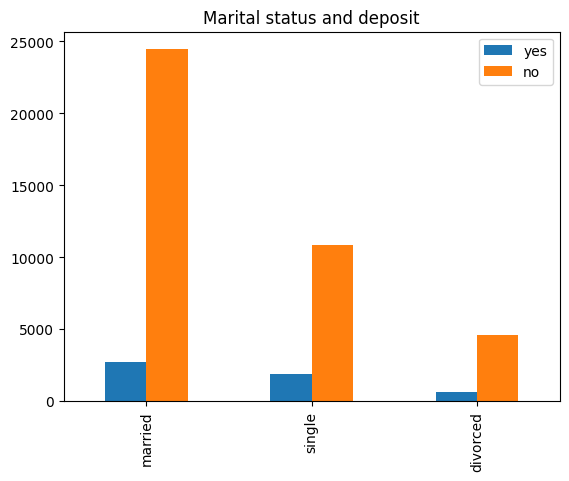

In [44]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank[bank['y'] == 'yes']['marital'].value_counts()
j_df['no'] = bank[bank['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')


<Axes: xlabel='y', ylabel='marital'>

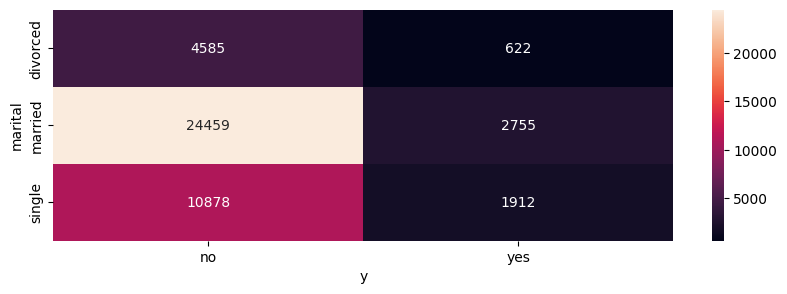

In [45]:
fig= plt.figure(figsize=(10, 3))
sns.heatmap(pd.crosstab(index=bank['marital'], columns=bank['y']), annot=True,
            fmt='g')


<Axes: title={'center': 'Education and deposit'}>

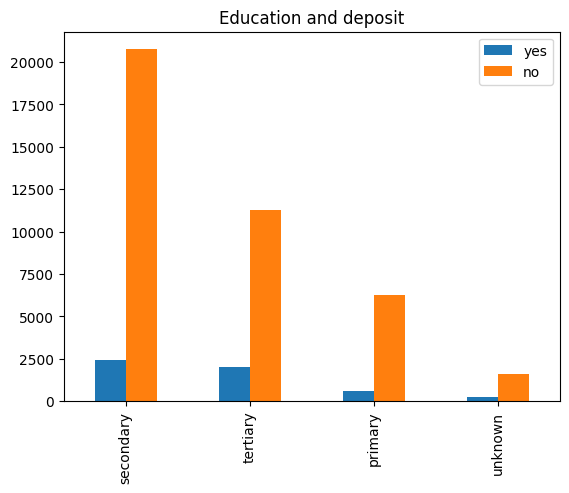

In [46]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank[bank['y'] == 'yes']['education'].value_counts()
j_df['no'] = bank[bank['y'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')


<Axes: xlabel='y', ylabel='education'>

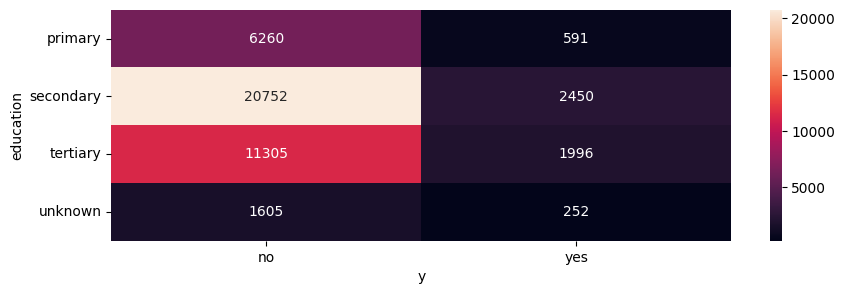

In [47]:
fig= plt.figure(figsize=(10, 3))
sns.heatmap(pd.crosstab(index=bank['education'], columns=bank['y']), annot=True,
            fmt='g')


<Axes: title={'center': 'Type of contact and deposit'}>

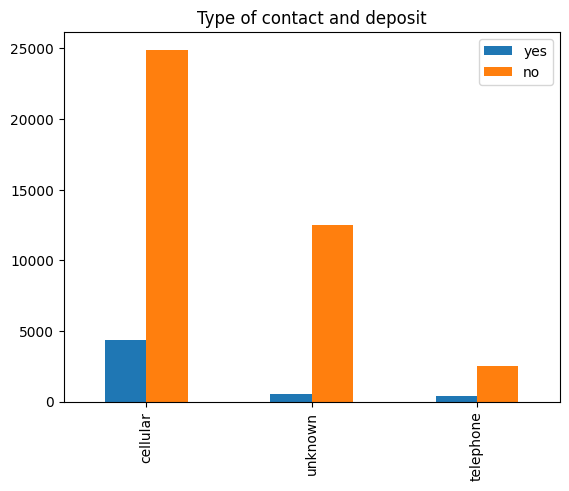

In [48]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank[bank['y'] == 'yes']['contact'].value_counts()
j_df['no'] = bank[bank['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')


<Axes: xlabel='y', ylabel='contact'>

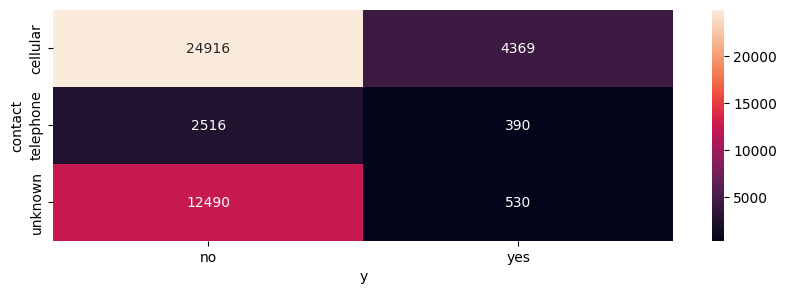

In [49]:
fig= plt.figure(figsize=(10, 3))
sns.heatmap(pd.crosstab(index=bank['contact'], columns=bank['y']), annot=True,
            fmt='g')

<Axes: title={'center': 'Type of possible outcome and deposit'}>

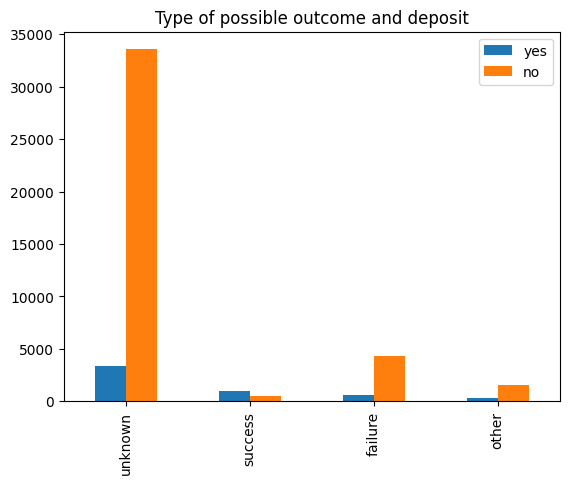

In [50]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank[bank['y'] == 'yes']['poutcome'].value_counts()
j_df['no'] = bank[bank['y'] == 'no']['poutcome'].value_counts()

j_df.plot.bar(title = 'Type of possible outcome and deposit')

<Axes: xlabel='y', ylabel='poutcome'>

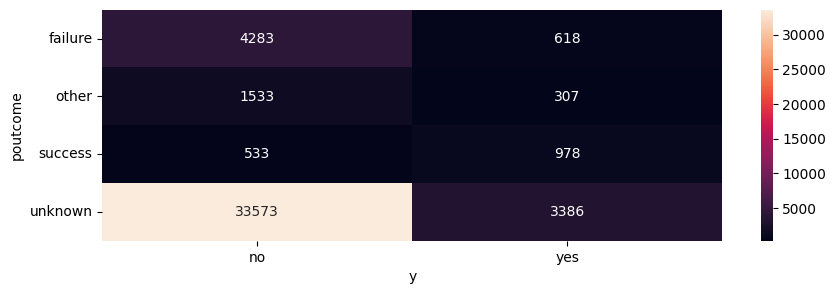

In [51]:
fig= plt.figure(figsize=(10, 3))
sns.heatmap(pd.crosstab(index=bank['poutcome'], columns=bank['y']), annot=True,
            fmt='g')

<Axes: title={'center': 'Loan and deposit'}>

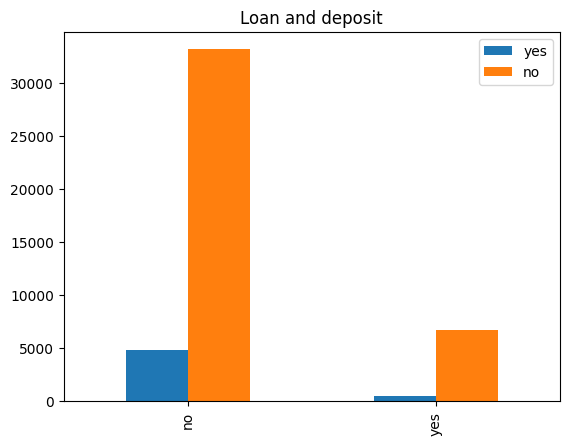

In [52]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank[bank['y'] == 'yes']['loan'].value_counts()
j_df['no'] = bank[bank['y'] == 'no']['loan'].value_counts()

j_df.plot.bar(title = 'Loan and deposit')

<Axes: xlabel='y', ylabel='loan'>

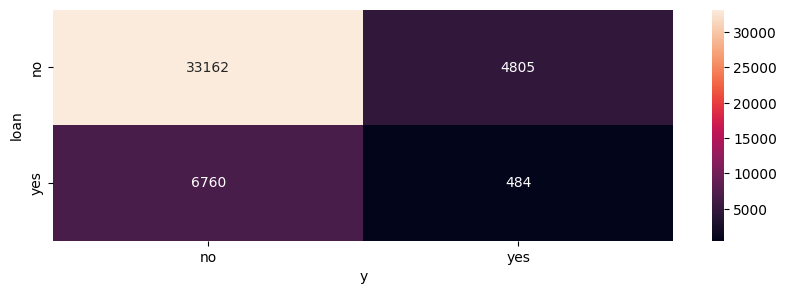

In [53]:
fig= plt.figure(figsize=(10, 3))
sns.heatmap(pd.crosstab(index=bank['loan'], columns=bank['y']), annot=True,
            fmt='g')


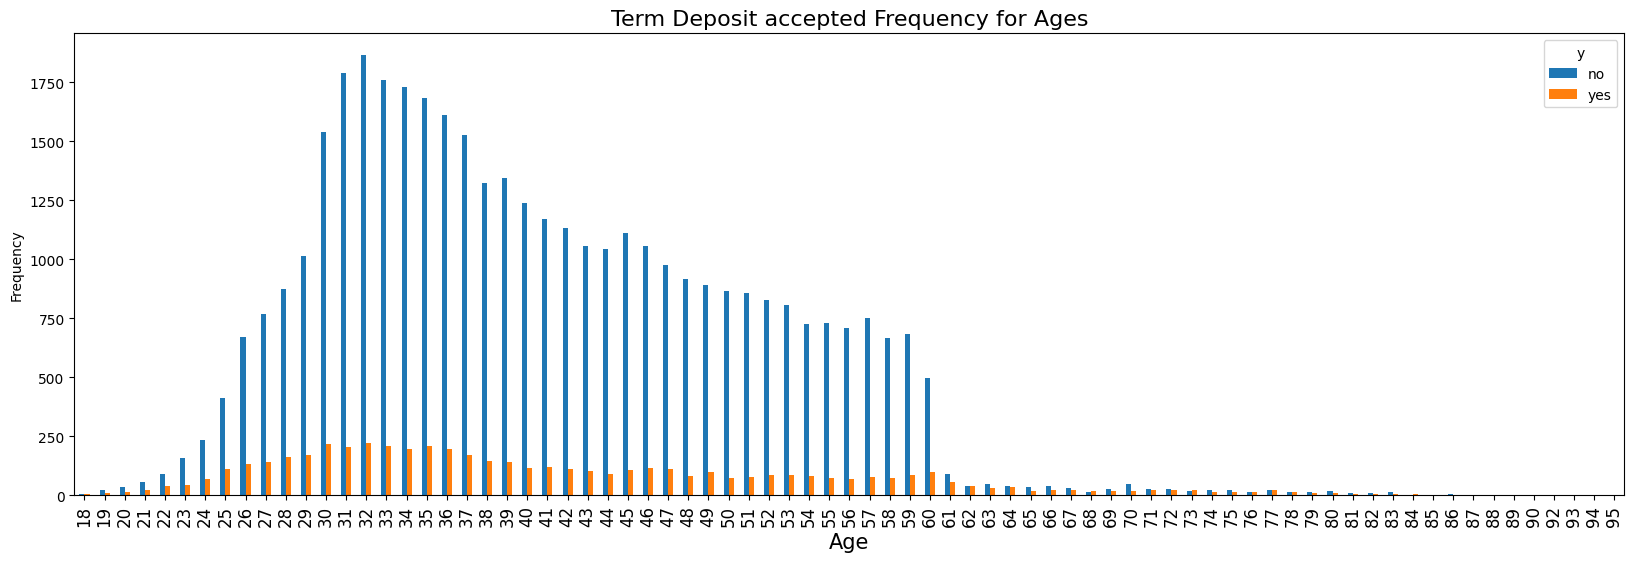

In [54]:
# Analyzing Relation by plotting Continuous features with the Target Feature

pd.crosstab(bank.age,bank.y).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

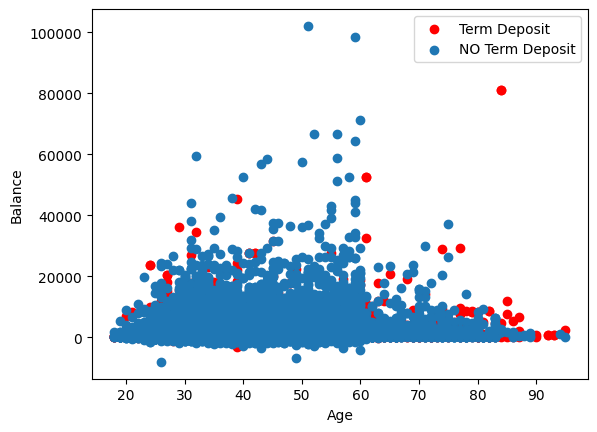

In [55]:
plt.scatter(x=bank.age[bank.y== 'yes'], y=bank.balance[(bank.y== 'yes')], c="red")
plt.scatter(x=bank.age[bank.y== 'no'], y=bank.balance[(bank.y== 'no')])
plt.legend(["Term Deposit", "NO Term Deposit"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

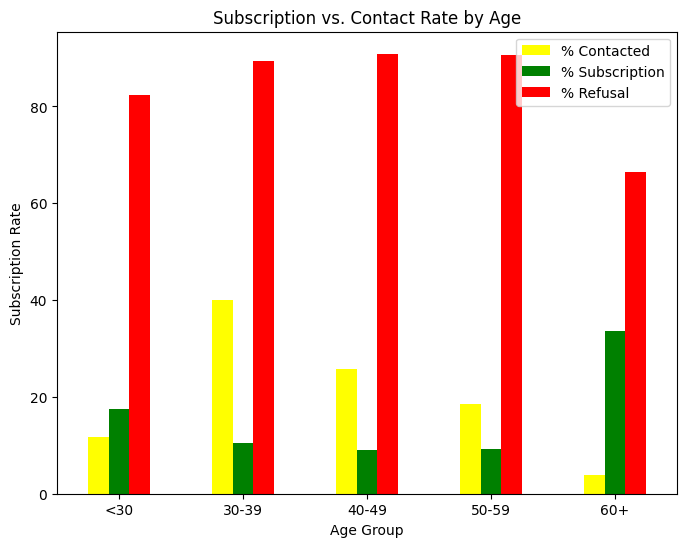

In [56]:
#Visualize the subscription and contact rate by age

lst = [bank]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

count_age_response_pct = pd.crosstab(bank['y'],bank['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(bank['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age['% Refusal'] = count_age_response_pct['no']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Contacted','% Subscription','% Refusal']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('yellow','green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

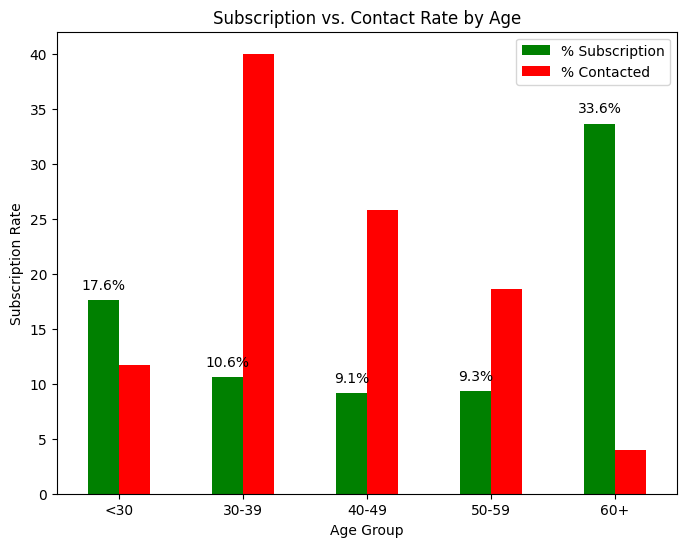

In [57]:
lst = [bank]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

count_age_response_pct = pd.crosstab(bank['y'],bank['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(bank['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Subscription'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2,
                      rec.get_height() + 1,
                      label+'%',
                      ha = 'center',
                      color = 'black')

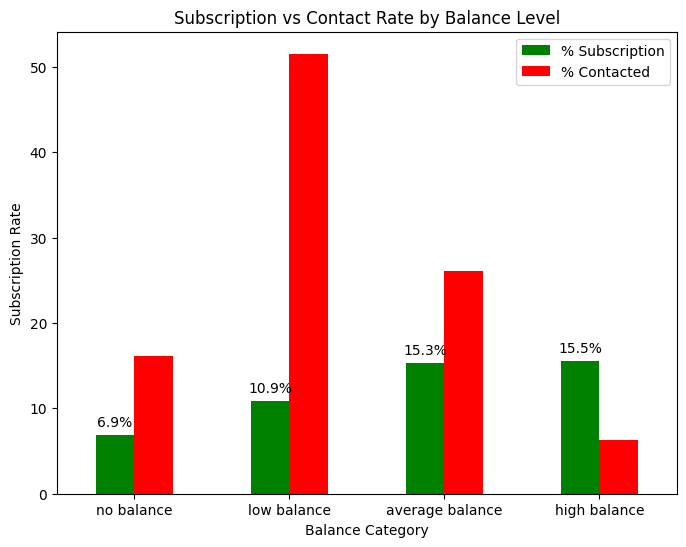

In [58]:
#Visualize the subscription rate by balance level
lst = [bank]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

count_balance_response_pct = pd.crosstab(bank['y'],bank['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(bank['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2,
                      rec.get_height() + 1,
                      label+'%',
                      ha = 'center',
                      color = 'black')


In [59]:
#Visualize the subscription rate by age and balance
# Step 1: Change column name: 'y' to 'response'
df  =bank.copy()
df.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(data, new_column, old_column):
    data[new_column] = data[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return data[new_column].value_counts()

convert(df, "response_binary", "response")


0    39922
1     5289
Name: response_binary, dtype: int64

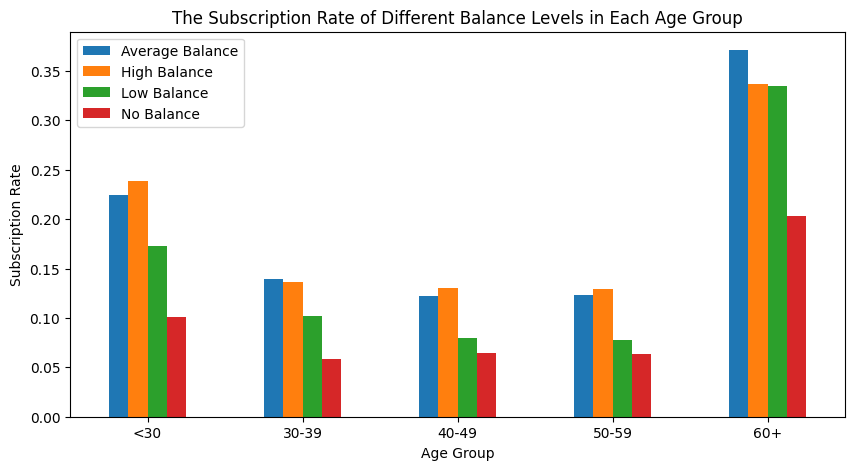

In [60]:
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()
age_bal = age_balance1.plot(kind='bar',figsize = (10,5))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()


In [61]:
#Visualize the subscription rate by job
count_job_response_pct = pd.crosstab(df['response'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,87.797331,92.725031,91.728312,91.209677,86.244449,77.208481,88.157061,91.116996,71.321962,88.943004,84.497314,88.194444
yes,12.202669,7.274969,8.271688,8.790323,13.755551,22.791519,11.842939,8.883004,28.678038,11.056996,15.502686,11.805556


In [62]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct


response,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


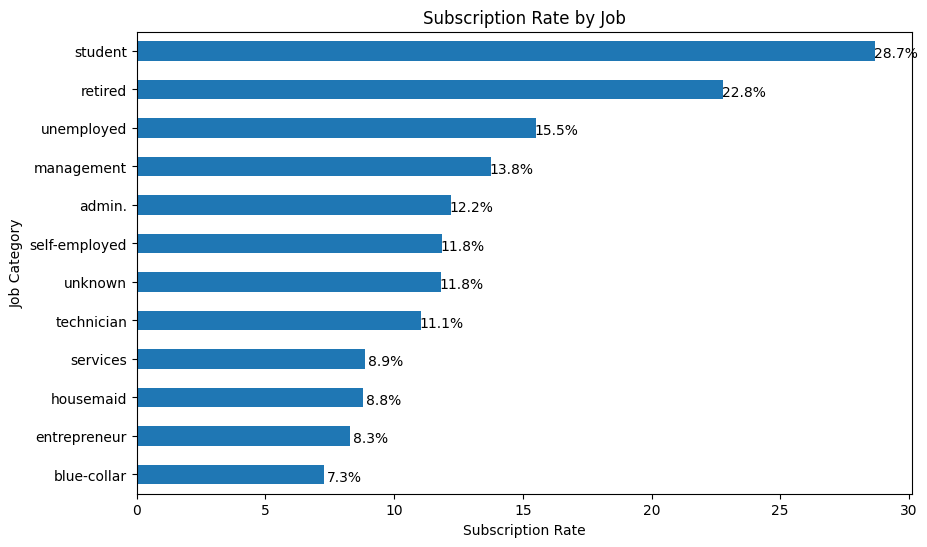

In [63]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (10,6))

plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8,
                  rec.get_y()+ rec.get_height()-0.5,
                  label+'%',
                  ha = 'center',
                  va='bottom')

In [64]:
#Visualize the subscription rate by Education

df.education.unique()


array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [65]:
count_education_response_pct = pd.crosstab(df['response'],df['education']).apply(lambda x: x/x.sum() * 100)
count_education_response_pct = count_education_response_pct.transpose()
count_education_response_pct


response,no,yes
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


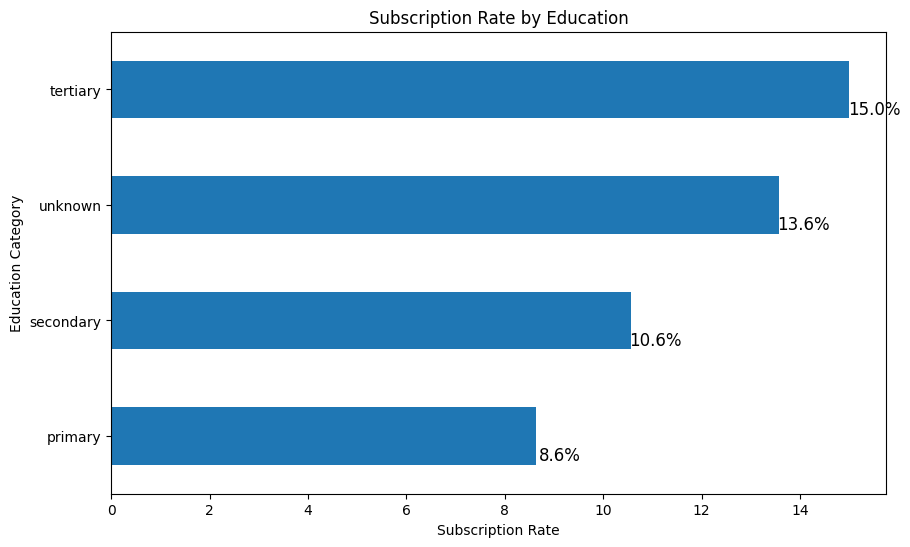

In [66]:
plot_education = count_education_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (10,6))

plt.title('Subscription Rate by Education')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_education.patches,
                      count_education_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.5,
                  rec.get_y()+ rec.get_height()-0.5,
                  label+'%',
                  ha = 'center',
                  va='bottom',
                fontsize = 'large')


In [67]:
#'Unkown' values were found in some of the features

cols = [col for col in bank.columns]
col_missing = []
for col in cols:
    if 'unknown' in bank[col].values:
        col_missing.append(col)

print("Columns with Unknown Values -",col_missing)


Columns with Unknown Values - ['job', 'education', 'contact', 'poutcome']


In [68]:
print("Unknown values count")
for col in col_missing:
    print(col,"-",bank[bank[col].str.contains('unknown')][col].count())


Unknown values count
job - 288
education - 1857
contact - 13020
poutcome - 36959


In [69]:
print(bank.groupby(bank['job'])['job'].count(),"\n")


job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64 



In [70]:
print(bank.groupby(bank['education'])['education'].count(),"\n")


education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64 



In [71]:
print(bank.groupby(bank['poutcome'])['poutcome'].count(),"\n")


poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



In [72]:
print(bank.groupby(bank['contact'])['contact'].count(),"\n")


contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 



In [73]:
#Creating and transforming data
df = bank.copy()


In [74]:
df[['job','education','contact','poutcome']] = df[['job','education','contact','poutcome']].replace(['unknown'],'other')


In [75]:
df.poutcome.value_counts()


other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [76]:
# Custom Binary Encoding of Binary o/p variables
df['default'] = np.where(df['default'].str.contains("yes"), 1, 0)
df['housing'] = np.where(df['housing'].str.contains("yes"), 1, 0)
df['loan'] = np.where(df['loan'].str.contains("yes"), 1, 0)
df['y'] = np.where(df['y'].str.contains("yes"), 1, 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,balance_group
0,58,management,married,tertiary,0,2143,1,0,other,5,may,261,1,-1,0,other,0,50.0,average balance
1,44,technician,single,secondary,0,29,1,0,other,5,may,151,1,-1,0,other,0,40.0,low balance
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,may,76,1,-1,0,other,0,30.0,low balance
3,47,blue-collar,married,other,0,1506,1,0,other,5,may,92,1,-1,0,other,0,40.0,average balance
4,33,other,single,other,0,1,0,0,other,5,may,198,1,-1,0,other,0,30.0,low balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,other,1,50.0,low balance
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,other,1,60.0,average balance
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1,60.0,high balance
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,other,0,50.0,low balance


In [77]:
categorical = df.select_dtypes(include=['object'])
categorical.head()


,job,marital,education,contact,month,poutcome,balance_group
0,management,married,tertiary,other,may,other,average balance
1,technician,single,secondary,other,may,other,low balance
2,entrepreneur,married,secondary,other,may,other,low balance
3,blue-collar,married,other,other,may,other,average balance
4,other,single,other,other,may,other,low balance


In [78]:
categorical.poutcome.value_counts()


other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [79]:
dummies = pd.get_dummies(categorical)
dummies.head()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_average balance,balance_group_high balance,balance_group_low balance,balance_group_no balance
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [80]:
df = pd.concat([df,dummies],axis=1)
df.drop(columns=categorical.columns,axis=1,inplace=True)


In [81]:
pd.set_option("display.max.columns", None)
df


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_average balance,balance_group_high balance,balance_group_low balance,balance_group_no balance
0,58,0,2143,1,0,5,261,1,-1,0,0,50.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,40.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,0,30.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,30.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,50.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,60.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,60.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,50.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [82]:
df.columns


Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'age_group', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_other', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_other', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_cellular', 'contact_other',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'balance_group_average balance',
       'balance_group_high balance', 'balance_group_low balance',
       'balance_group_no balance'],
      dtype='object')

In [83]:
df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success']]=df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success']].astype('int64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            45211 non-null  int64  
 1   default                        45211 non-null  int64  
 2   balance                        45211 non-null  int64  
 3   housing                        45211 non-null  int64  
 4   loan                           45211 non-null  int64  
 5   day                            45211 non-null  int64  
 6   duration                       45211 non-null  int64  
 7   campaign                       45211 non-null  int64  
 8   pdays                          45211 non-null  int64  
 9   previous                       45211 non-null  int64  
 10  y                              45211 non-null  int64  
 11  age_group                      45211 non-null  float64
 12  job_admin.                     45211 non-null 

In [87]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df=df.replace(order)

In [89]:
# Change the unit of 'duration' from seconds to minutes
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_average balance,balance_group_high balance,balance_group_low balance,balance_group_no balance
0,58,0,2143,1,0,5,4.35,1,-1,0,0,50.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,44,0,29,1,0,5,2.52,1,-1,0,0,40.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,33,0,2,1,1,5,1.27,1,-1,0,0,30.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,47,0,1506,1,0,5,1.53,1,-1,0,0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,33,0,1,0,0,5,3.30,1,-1,0,0,30.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [90]:
#Applying Standard Scaler
from sklearn.preprocessing import StandardScaler

df_standard_scaled = df.copy()
column_name= ['balance','age','duration']
features = df_standard_scaled[column_name]
rest = [columns for columns in df.columns if columns not in column_name]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = column_name)
df_standard_scaled[rest] = df[rest]
df_standard_scaled.head()


,balance,age,duration,default,housing,loan,day,campaign,pdays,previous,y,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_average balance,balance_group_high balance,balance_group_low balance,balance_group_no balance
0,0.256419,1.606965,0.011014,0,1,0,5,1,-1,0,0,50.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,-0.437895,0.288529,-0.415353,0,1,0,5,1,-1,0,0,40.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,-0.446762,-0.747384,-0.706586,0,1,1,5,1,-1,0,0,30.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,0.047205,0.571051,-0.646010,0,1,0,5,1,-1,0,0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,-0.447091,-0.747384,-0.233623,0,0,0,5,1,-1,0,0,30.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [91]:
#Feature Selection
x = df_standard_scaled.drop('y', 1)
y = df_standard_scaled['y']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [93]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of X_train:  (36168, 52)
Shape of X_test:  (9043, 52)
Shape of y_train:  (36168,)
Shape of y_test (9043,)


In [94]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

In [95]:
# Model to Test
classifier = LogisticRegression()

# Select Best X Features
rfe = RFE(classifier,n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)


In [96]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)


[False False  True False  True False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False  True False False False  True
 False  True  True  True  True False  True  True  True  True  True  True
 False False False False]
[36 25  1 31  1  3 34 20 38 30 26 14 17 13  9 27 18  6 23 21  1 29 35 24
 10 32 33  7 28 15  4  1  5 22  2  1 12  1  1  1  1 11  1  1  1  1  1  1
 16 19 37  8]


In [97]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))


[('balance', False, 36),
 ('age', False, 25),
 ('duration', True, 1),
 ('default', False, 31),
 ('housing', True, 1),
 ('loan', False, 3),
 ('day', False, 34),
 ('campaign', False, 20),
 ('pdays', False, 38),
 ('previous', False, 30),
 ('age_group', False, 26),
 ('job_admin.', False, 14),
 ('job_blue-collar', False, 17),
 ('job_entrepreneur', False, 13),
 ('job_housemaid', False, 9),
 ('job_management', False, 27),
 ('job_other', False, 18),
 ('job_retired', False, 6),
 ('job_self-employed', False, 23),
 ('job_services', False, 21),
 ('job_student', True, 1),
 ('job_technician', False, 29),
 ('job_unemployed', False, 35),
 ('marital_divorced', False, 24),
 ('marital_married', False, 10),
 ('marital_single', False, 32),
 ('education_other', False, 33),
 ('education_primary', False, 7),
 ('education_secondary', False, 28),
 ('education_tertiary', False, 15),
 ('contact_cellular', False, 4),
 ('contact_other', True, 1),
 ('contact_telephone', False, 5),
 ('month_apr', False, 22),
 ('month

In [98]:
x_train.columns[rfe.support_]


Index(['duration', 'housing', 'job_student', 'contact_other', 'month_dec',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [99]:
x_train.columns[~rfe.support_]


Index(['balance', 'age', 'default', 'loan', 'day', 'campaign', 'pdays',
       'previous', 'age_group', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_other', 'education_primary',
       'education_secondary', 'education_tertiary', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_feb', 'month_may',
       'balance_group_average balance', 'balance_group_high balance',
       'balance_group_low balance', 'balance_group_no balance'],
      dtype='object')

In [100]:
import statsmodels.api as sm


In [101]:
col1 = x_train.columns[rfe.support_]
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36153
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8753.0
Date:                Fri, 24 Nov 2023   Deviance:                       17506.
Time:                        18:10:05   Pearson chi2:                 1.63e+07
No. Iterations:                    27   Pseudo R-squ. (CS):             0.2111
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8741      0.032    -27.738      0.000      -0.936      -0.812
duration             1.0883      0.018     59.039      0.000       1.052       1.124
housing             -0.6537      0.044    -14.941      0.000      -0.740      -0.568
job_student          0.7082      0.104      6.842      0.000       0.505       0.911
contact_other       -1.8259      0.078    -23.315      0.000      -1.979      -1.672
month_dec            1.1853      0.181      6.537      0.000       0.830       1.541
month_jan           -0.5709      0.117     -4.862      0.000      -0.801      -0.341
month_jul           -0.5700      0.063     -9.019      0.000      -0.694      -0.446
month_jun            0.9082      0.080     11.377      0.000       0.752       1.065
month_mar            2.1601      0.118     18.366      0.000       1.930       2.391
month_nov           -0.4213      0.074     -5.688      0.000      -0.566      -0.276
month_oct            1.4569      0.106     13.713      0.000       1.249       1.665
month_sep            1.4589      0.120     12.184      0.000       1.224       1.694
poutcome_failure    -1.0432      0.048    -21.918      0.000      -1.136      -0.950
poutcome_other      -1.1695      0.030    -38.869      0.000      -1.229      -1.111
poutcome_success     1.3386      0.055     24.549      0.000       1.232       1.446
====================================================================================
"""

In [102]:
# predicted values of the train dataset giving the probability
x_test_sm = sm.add_constant(x_test[col1])
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

14001    0.018470
32046    0.678149
13318    0.064301
42991    0.038482
14237    0.049444
14360    0.021600
36635    0.050503
37042    0.033069
25994    0.048321
14555    0.028409
dtype: float64

In [103]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]


array([0.01846971, 0.67814896, 0.06430088, 0.03848191, 0.04944441,
       0.02159976, 0.05050276, 0.03306892, 0.04832055, 0.02840913])

In [104]:
#creating dataframe with actual subcription and predicted probabilities
y_test_pred_final = pd.DataFrame({'Sub':y_test.values,'Sub_prob':y_test_pred})
y_test_pred_final['Cust_id'] = y_test.index
y_test_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.018470,14001
1,1,0.678149,32046
2,0,0.064301,13318
3,0,0.038482,42991
4,0,0.049444,14237
5,0,0.021600,14360
6,0,0.050503,36635
7,0,0.033069,37042
8,0,0.048321,25994
9,0,0.028409,14555


In [122]:
# Create y_test_pred_final DataFrame
y_test_pred_final = pd.DataFrame({'Sub': y_test.values, 'Sub_prob': y_test_pred, 'Cust_id': y_test.index})

# Display the first 10 rows
print(y_test_pred_final.head(10))

# Create 'predict' column
y_test_pred_final['predict'] = y_test_pred_final['Sub_prob'].apply(lambda x: 1 if x > 0.5 else 0)

# Display the first 10 rows of the modified DataFrame
print(y_test_pred_final.head(10))


   Sub  Sub_prob  Cust_id
0    0  0.018470    14001
1    1  0.678149    32046
2    0  0.064301    13318
3    0  0.038482    42991
4    0  0.049444    14237
5    0  0.021600    14360
6    0  0.050503    36635
7    0  0.033069    37042
8    0  0.048321    25994
9    0  0.028409    14555
   Sub  Sub_prob  Cust_id  predict
0    0  0.018470    14001        0
1    1  0.678149    32046        1
2    0  0.064301    13318        0
3    0  0.038482    42991        0
4    0  0.049444    14237        0
5    0  0.021600    14360        0
6    0  0.050503    36635        0
7    0  0.033069    37042        0
8    0  0.048321    25994        0
9    0  0.028409    14555        0


In [123]:
# creating confusion matrix for the following prediction
confusion = cm(y_test_pred_final.Sub, y_test_pred_final.predict)
confusion


array([[7763,  217],
       [ 694,  369]])

In [124]:
print(ac(y_test_pred_final.Sub, y_test_pred_final.predict))


0.8992590954329316


In [125]:
# print the classification report
print('After Feature Selection','\n',report(y_test_pred_final.Sub, y_test_pred_final.predict))


After Feature Selection 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.63      0.35      0.45      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



In [126]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()

    return None


In [127]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final.Sub, y_test_pred_final.Sub_prob,drop_intermediate=False)


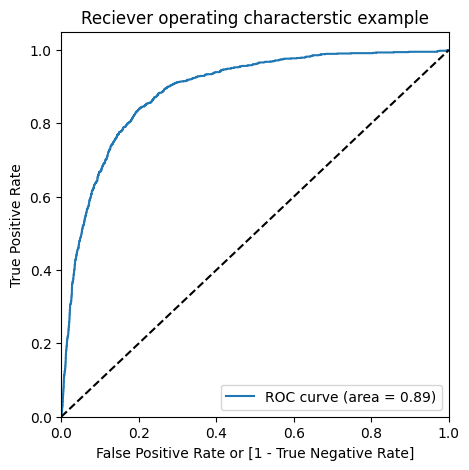

In [128]:
draw_roc(y_test_pred_final.Sub, y_test_pred_final.Sub_prob)


<Axes: >

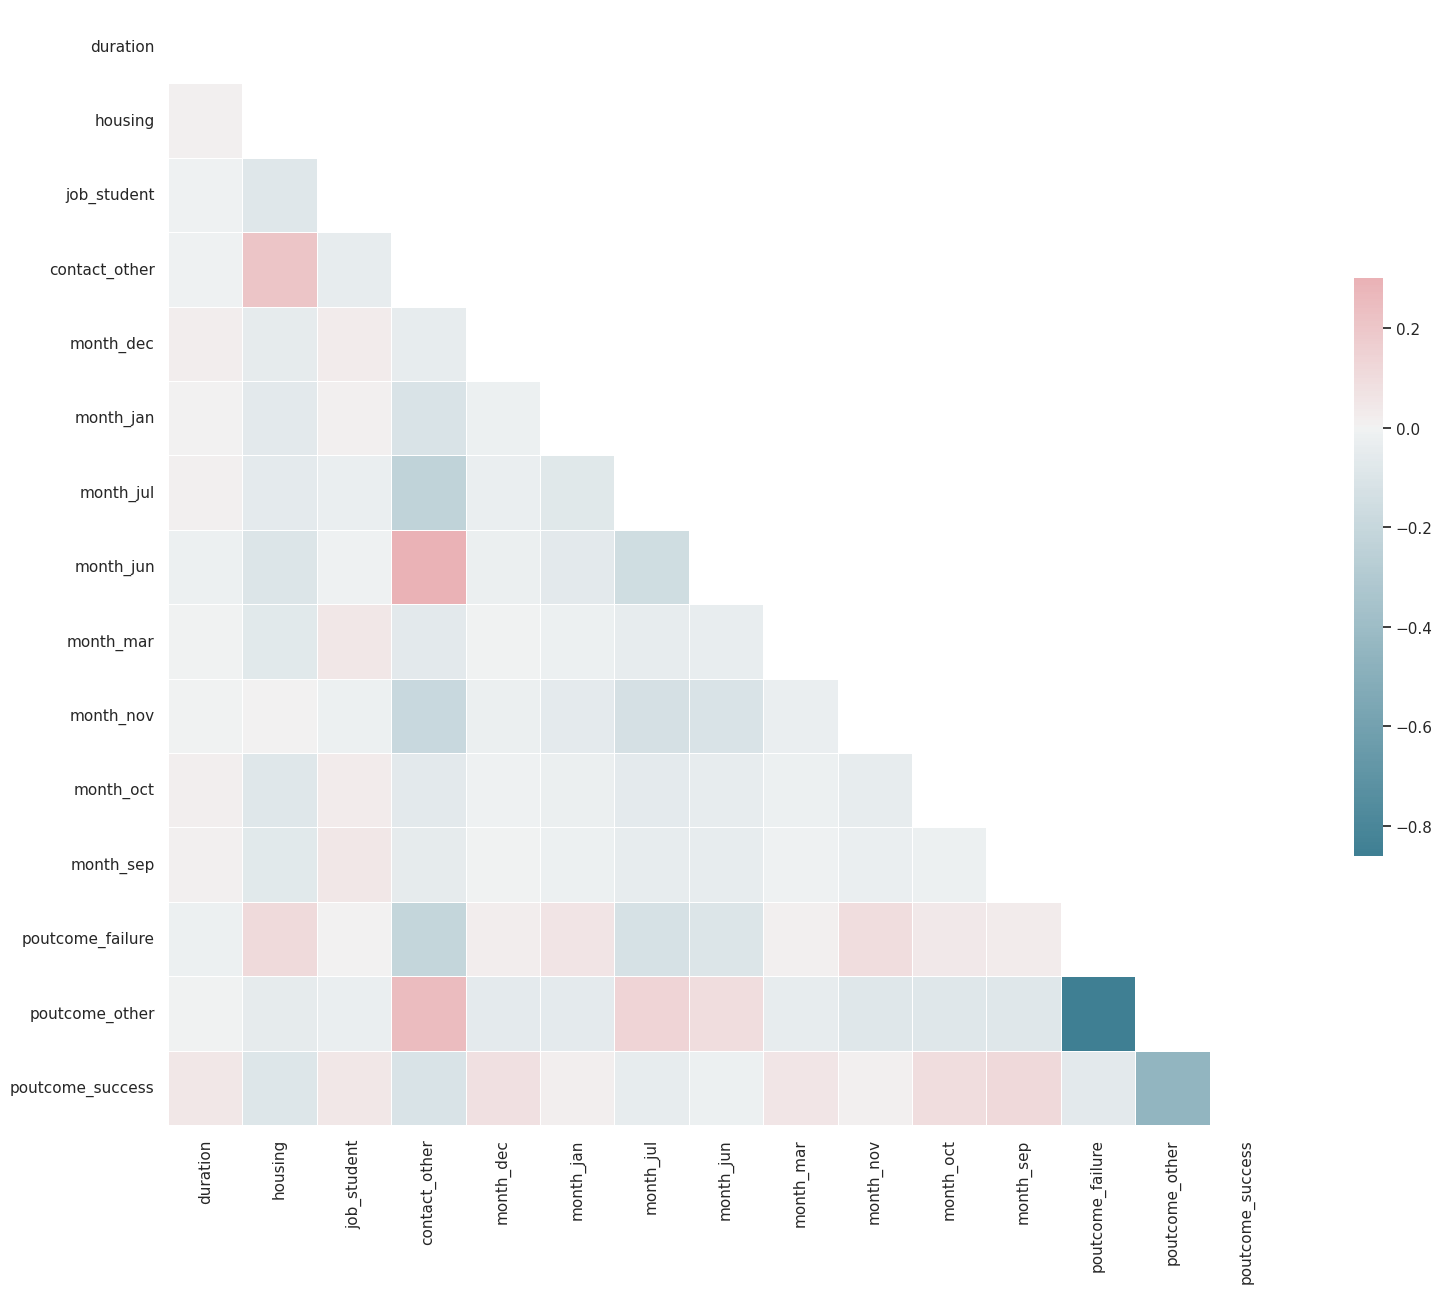

In [129]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = x_train[x_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [130]:
#Sklearn Logistic Regression and Accuracy
accuracy = {}

feature_selection = LogisticRegression()
feature_selection.fit(x_train[x_train.columns[rfe.support_]], y_train)
ACC = feature_selection.score(x_test[x_test.columns[rfe.support_]],y_test)*100

accuracy['Logistic Regression after Feature Selection'] = ACC
print("Test Accuracy {:.2f}%".format(ACC))


Test Accuracy 89.89%


In [131]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))


Test Accuracy 89.76%


In [132]:
#Predictions
y_predict = lr.predict(x_test)
y_pred = feature_selection.predict(x_test[x_test.columns[rfe.support_]])

print('Without Feature Selection','\n', cm(y_test, y_predict))
print('After Feature Selection','\n', cm(y_test, y_pred))


Without Feature Selection 
 [[7748  232]
 [ 694  369]]
After Feature Selection 
 [[7763  217]
 [ 697  366]]


In [133]:
# print the classification report

print('Without Feature Selection','\n',report(y_test, y_predict))
print('After Feature Selection','\n',report(y_test, y_pred))


Without Feature Selection 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.61      0.35      0.44      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043

After Feature Selection 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.63      0.34      0.44      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.69      9043
weighted avg       0.88      0.90      0.89      9043



In [135]:
lr.predict_proba(x)[:,1]

array([0.01422327, 0.01039317, 0.00296151, ..., 0.98635655, 0.13088032,
       0.28614028])

In [136]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(lr.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(lr.score(x_test, y_test)*100))


Training set score: 90.23%
Test set score: 89.76%


In [137]:
#Compare model accuracy with null accuracy
# check class distribution in test set

y_test.value_counts()


0    7980
1    1063
Name: y, dtype: int64

In [138]:
print("Mean of 1's",y_test.mean(),"\n Percentage of 1's",np.round(y_test.mean(),2)*100,'%')


Mean of 1's 0.1175494857901139 
 Percentage of 1's 12.0 %


In [139]:
# calculate the percentage of zeros
print("Mean of 0's",1-y_test.mean(),"\n Percentage of 0's",np.round(1-y_test.mean(),2)*100,'%')


Mean of 0's 0.8824505142098861 
 Percentage of 0's 88.0 %


In [140]:
# calculate null accuracy
y_test.value_counts().head(1) / len(y_test)


0    0.882451
Name: y, dtype: float64

In [141]:
#Predictions
y_predict = lr.predict(x_test)

print(cm(y_test, y_predict))

[[7748  232]
 [ 694  369]]


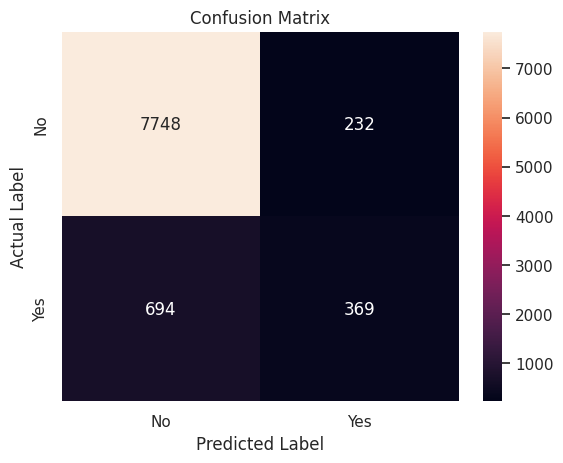

In [142]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_predict)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


In [143]:
y_predict = lr.predict(x)

print(cm(y, y_predict))

[[38929   993]
 [ 3465  1824]]


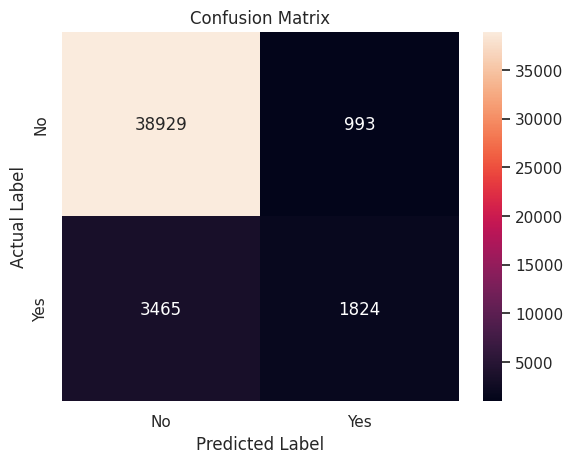

In [144]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y, y_predict)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


In [153]:
# Assuming y_test and y_predict are your actual and predicted labels, respectively
min_length = min(len(y_test), len(y_predict))
y_test = y_test[:min_length]
y_predict = y_predict[:min_length]

# Now both arrays should have the same length
confusion = confusion_matrix(y_test, y_predict)
print(confusion)

# Extracting values from confusion matrix
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


[[7905   75]
 [1052   11]]


In [154]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(ac(y_test, y_predict))

0.8753732168528143
0.8753732168528143


In [155]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - ac(y_test, y_predict))


0.12462678314718567
0.12462678314718567


In [156]:
recall = TP / float(FN + TP)

print(recall)
print(recall_score(y_test, y_predict))

0.010348071495766699
0.010348071495766699


In [157]:
specificity = TN / (TN + FP)

print(specificity)


0.9906015037593985


In [158]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)


0.009398496240601503
0.009398496240601517


In [159]:
precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_predict))


0.12790697674418605
0.12790697674418605


In [160]:
f1_score = 2*((precision_score(y_test, y_predict) * recall_score(y_test, y_predict))/(precision_score(y_test, y_predict) + recall_score(y_test, y_predict)))
f1_score


0.01914708442123586

In [161]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = lr.predict_proba(x_test)[0:10]

y_pred_prob


array([[0.9898159 , 0.0101841 ],
       [0.28742765, 0.71257235],
       [0.98949954, 0.01050046],
       [0.98884588, 0.01115412],
       [0.98448746, 0.01551254],
       [0.98521092, 0.01478908],
       [0.9619789 , 0.0380211 ],
       [0.97630925, 0.02369075],
       [0.94259834, 0.05740166],
       [0.99139558, 0.00860442]])

In [162]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Subscription (0)', 'Prob of - Subscription (1)'])

y_pred_prob_df

,Prob of - No Subscription (0),Prob of - Subscription (1)
0,0.989816,0.010184
1,0.287428,0.712572
2,0.989500,0.010500
3,0.988846,0.011154
4,0.984487,0.015513
5,0.985211,0.014789
6,0.961979,0.038021
7,0.976309,0.023691
8,0.942598,0.057402
9,0.991396,0.008604


Text(0, 0.5, 'Frequency')

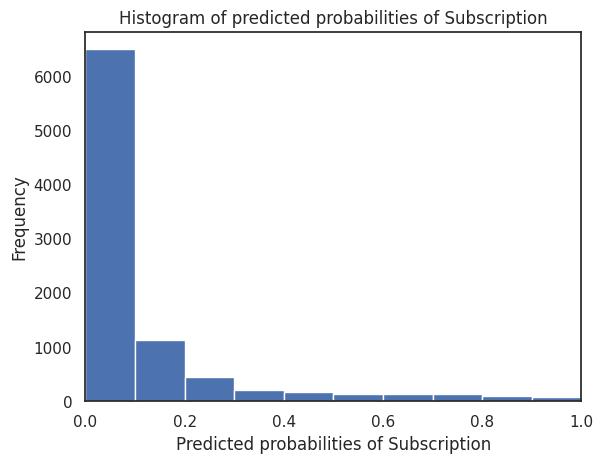

In [163]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = lr.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')


In [164]:
from sklearn.preprocessing import binarize

for i in range(1,5):

    cm1=0

    y_pred1 = lr.predict_proba(x_test)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, threshold=i/10)

    cm1 = cm(y_test, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',

            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Positives), ','\n\n',

            cm1[1,0],'Type II errors( False Negatives), ','\n\n',

               'Accuracy score: ', (ac(y_test, y_pred2)), '\n\n',

               'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

               'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',

                '====================================================', '\n\n')


With 0.1 threshold the Confusion Matrix is  

 [[6313 1667]
 [ 173  890]] 

 with 7203 correct predictions,  

 1667 Type I errors( False Positives),  

 173 Type II errors( False Negatives),  

 Accuracy score:  0.7965277009841867 

 Sensitivity:  0.8372530573847601 

 Specificity:  0.7911027568922305 



With 0.2 threshold the Confusion Matrix is  

 [[7236  744]
 [ 383  680]] 

 with 7916 correct predictions,  

 744 Type I errors( False Positives),  

 383 Type II errors( False Negatives),  

 Accuracy score:  0.8753732168528143 

 Sensitivity:  0.6396989651928504 

 Specificity:  0.9067669172932331 



With 0.3 threshold the Confusion Matrix is  

 [[7524  456]
 [ 541  522]] 

 with 8046 correct predictions,  

 456 Type I errors( False Positives),  

 541 Type II errors( False Negatives),  

 Accuracy score:  0.8897489771093664 

 Sensitivity:  0.49106302916274697 

 Specificity:  0.9428571428571428 



With 0.4 threshold the Confusion Matrix is  

 [[7660  320]
 [ 619  444]] 

 

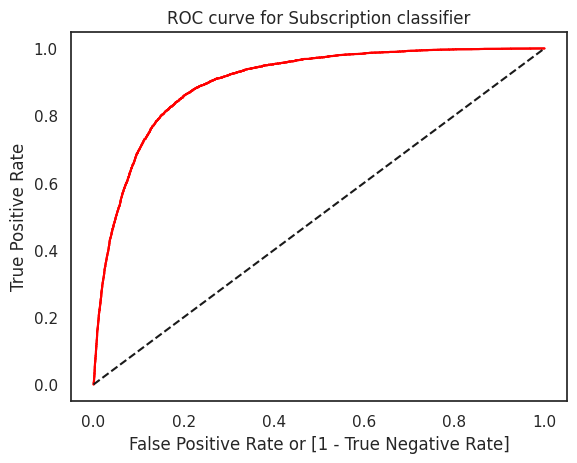

AUC-ROC Score: 0.5004747876275826


In [165]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_predict)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve for Subscription classifier')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC-ROC Score:',auc)


In [166]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_predict)
print(curve)

0.5004747876275826


In [167]:
final_prediction = lr.predict_proba(x)[:,1]
fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(ac(y, y_pred, normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()


,thresholds,accuracy
1294,0.479106,0.901462
1314,0.474266,0.901462
1217,0.501484,0.901462
1296,0.478631,0.901462
1292,0.479272,0.901440


In [169]:
from sklearn.metrics import roc_curve, f1_score
import pandas as pd
import numpy as np

# Assuming lr is your logistic regression model, x is your feature matrix, and y is your target variable

final_prediction = lr.predict_proba(x)[:, 1]
fpr, tpr, thresholds = roc_curve(y, lr.predict_proba(x)[:, 1])

f1_score_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction > thres, 1, 0)
    f1_score_ls.append(f1_score(y, y_pred))

f1_score_ls = pd.concat([pd.Series(thresholds), pd.Series(f1_score_ls)], axis=1)
f1_score_ls.columns = ['thresholds', 'f1_score']
f1_score_ls.sort_values(by='f1_score', ascending=False, inplace=True)
f1_score_ls.head()


,thresholds,f1_score
3356,0.188984,0.569522
3336,0.190144,0.569516
3354,0.189066,0.569499
3334,0.190231,0.569493
3357,0.188944,0.569477


In [170]:
# print the classification report

print(report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93      7980
           1       0.13      0.01      0.02      1063

    accuracy                           0.88      9043
   macro avg       0.51      0.50      0.48      9043
weighted avg       0.79      0.88      0.83      9043



In [171]:
#Predictions
y_pred = lr.predict(x)

# Creating a datframe to with actual value and predicted value

predict = pd.DataFrame({'Actual':y,'Predicted':y_pred})
predict

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [172]:
# import imblearn library and resample the original data using SMOTE technique
from sklearn.neighbors import DistanceMetric
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_smote))


Original dataset shape Counter({0: 31942, 1: 4226})
Resampled dataset shape Counter({1: 31942, 0: 31942})


In [173]:
# training a Logistic Regression model on SMOTE data

lr_smote = LogisticRegression()
lr_smote.fit(X_smote, y_smote)


LogisticRegression()

In [174]:
accuracies = {}

acc = lr_smote.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))


Test Accuracy 87.23%


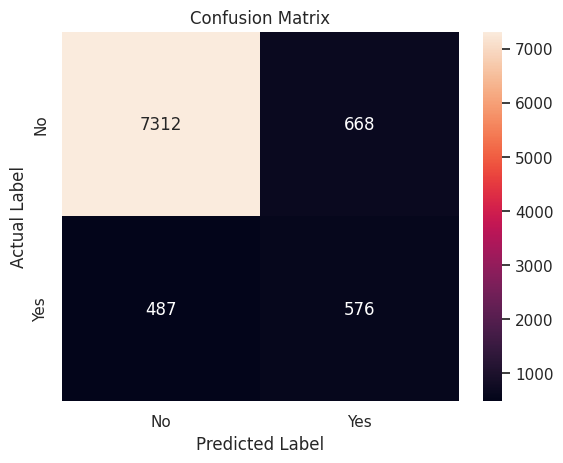

In [175]:
# plot confusion matrix to describe the performance of classifier.
#Predictions
y_predict_smote = lr_smote.predict(x_test)

cm_df_smote=cm(y_test, y_predict_smote)
class_label = ["No", "Yes"]
df_cm_smote = pd.DataFrame(cm_df_smote, index = class_label, columns = class_label)
sns.heatmap(df_cm_smote, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


In [176]:
# print the classification report

print(report(y_test, y_predict_smote))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7980
           1       0.46      0.54      0.50      1063

    accuracy                           0.87      9043
   macro avg       0.70      0.73      0.71      9043
weighted avg       0.88      0.87      0.88      9043



In [178]:
pip install plot-metric


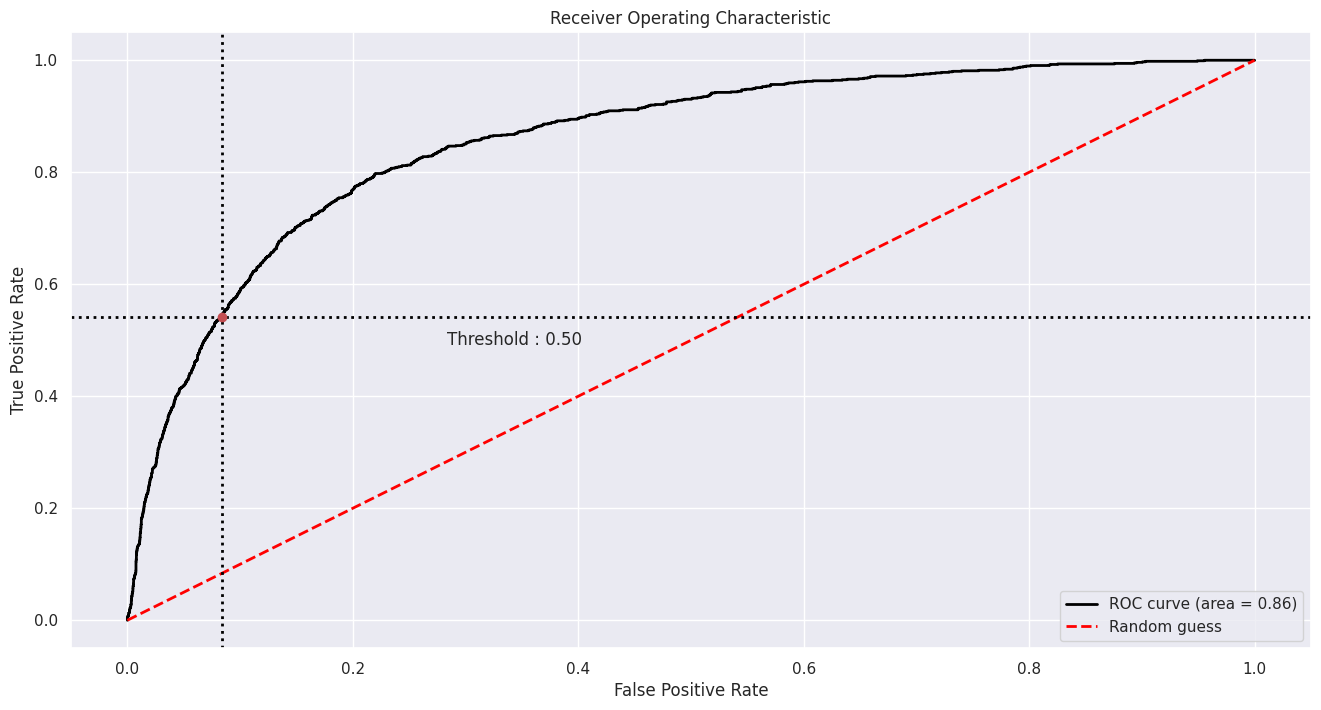

In [179]:
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt

# Assuming lr_smote is your logistic regression model trained on SMOTE data, x_test is your test feature set, and y_test is your test labels

bc = BinaryClassification(y_test, lr_smote.predict_proba(x_test)[:, 1], labels=[0, 1])
plt.figure(figsize=(16, 8))
bc.plot_roc_curve()
plt.show()


<Axes: >

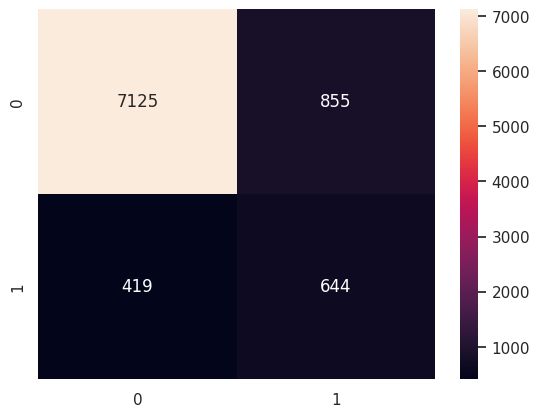

In [180]:
# compute the probabilites of test observations using rf_smote model

y_pred_proba = lr_smote.predict_proba(x_test)[:,1]
# compare these probabilities against the probability threshold of 6% rather than the default threshold of 50%

y_pred_labels = (y_pred_proba >= 0.4)
# plot the confusion matrix

sns.heatmap(cm(y_test, y_pred_labels), annot=True, fmt='0.0f')


In [181]:
# print the classification report

print(report(y_test, y_pred_labels))


              precision    recall  f1-score   support

           0       0.94      0.89      0.92      7980
           1       0.43      0.61      0.50      1063

    accuracy                           0.86      9043
   macro avg       0.69      0.75      0.71      9043
weighted avg       0.88      0.86      0.87      9043

